<div style="position: relative; text-align: center;">
  <img src="utiles/imagenes/portada.png" alt="INE" width="50%">
</div> <br><br>


<p style="text-align: center; font-size: 20px;"><u>ÍNDICE</u></p>

<span style="font-size: 15px;">

1. **Introducción**

2. **Importación de paquetes y Set de datos**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1. Paquetes<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2. DataSet

3. **Preprocesamiento e Inspección de datos**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1. Procesamiento inicial de datos<br>

4.  **Análisis exploratorio de datos**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1. Valores duplicados<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2. Porcentaje de valores nulos por variable<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3. Balance de clases<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4. Exploración de variables categoricas<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.5. Exploración de variables numéricas<br>

5. **Análisis exploratorio de datos por grupo**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1. Preparación del dataset<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2. Análisis de la tasa de éxito<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3. Análisis de los perfiles por grupo<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3.1. Distribución de saldos por grupo<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3.2. Adultos<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3.3. Jovenes<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3.4. Mayores<br>
    
    
6. **Modelaje**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.1. Tratamiento de valores nulos<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.2. Tratamiento de outliers<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3. Transformación de columnas<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.1. Limpieza columnas<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.1. Encoding<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.3.1. Eliminación de columnas<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.4. Balance de clases<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.5. Selección de Modelo<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.5.1. Cross Validation<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.6. Tuning GradientBoostingClassifier<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.6.1 Feature importance<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.7. Resultados y Conclusiones<br>

</span>

# 1. Introducción

<span style="font-size:larger;">

En el ámbito del contexto bancario, un depósito a plazo fijo es un producto ofrecido por el banco y es una de sus fuentes principales de ingresos. Un depósito a plazo fijo es un producto financiero de ahorro donde el cliente deposita una cantidad fija de dinero en una entidad bancaria durante un periodo de tiempo establecido. Este tipo de depósitos ofrecen una rentabilidad traducida en intereses para el cliente y a su vez es dinero activo para la entidad bancaria.
    
Desde una entidad bancaria anónima, han lanzado diferentes estrategias para atraer a sus clientes a contratar este tipo de depósito. Las campañas telefónicas son las que más éxito siguen teniendo. Sin embargo, para llevar a cabo una campaña telefónica se requiere un gran esfuerzo debido al gran número de clientes que puede poseer una entidad bancaria. Así, uno de los **objetivos** que se ha propuesto la entidad bancaria es **identificar aquellos clientes que puedan tener más propensión a la contratación del producto** y realizar únicamente las llamadas a este tipo de clientes.
    
El conjunto de datos está relacionado con una campaña telefónica que realizó una entidad bancaria.
    
</span>

## OBJETIVOS:
<span style="font-size:larger;">
    
* Realizar un **análisis exploratorio** sobre los diferentes **tipos de clientes**.

* **Predecir** que clientes del conjunto de datos **contratarán** o no un **depósito**.
    
* **Explicación** de los **resultados** obtenidos.
    
* ¿Cómo llevarías la solución desarrollada a producción y qué consideraciones tendrías en cuenta?
    
</span>

# 2. Importación de paquetes y Set de datos

## 2.1. Paquetes

In [122]:
# Básicos
from joblib import dump, load
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import re


# Preprocesamiento:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Modelos de Clasificación:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Robustez:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Avisos
import warnings
warnings.filterwarnings("ignore")

## 2.2. DataSet

In [2]:
data_path = "Final_Dataset/"

- ### Datos de entrenamiento

In [3]:
train_data = pd.read_csv(data_path + "train.csv", sep=";")

In [4]:
train_data.head(1)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no


- ### Datos de testeo

In [5]:
test_data = pd.read_csv(data_path + "test.csv", sep=";")

In [6]:
test_data.head(1)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,50001,51,entrepreneur,casado,secundaria/superiores,si,-2082,no,si,movil,123,28-jul-2021,6,-1,0,NaN,no


# 3. Inspección general y preprocesamiento de datos

<span style="font-size:larger;">
    
En esta sección se realizaran las transformaciones necesarias en los datos para realizar un **análisis general** de estos y tener un primer acercamiento sobre las variables categoricas y númericas, extrayendo insights generales de nuestros clientes.

</span>

In [8]:
data = train_data.copy()

In [9]:
data.head(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no


| **Column**                       | **Description**                                                                                                      | **Type** |
|----------------------------------|----------------------------------------------------------------------------------------------------------------------|----------|
| ID                               | Identificador del cliente.                                                                                           | Int      |
| trabajo                          | Variable categórica dónde indica a que se dedica un cliente.                                                         | Object   |
| edad                             | Edad del cliente                                                                                                     | Int      |
| estado_civil                     | Estado civil del cliente: casado, divorciado, soltero                                                                | Object   |
| educacion                        | Nivel de estudios del cliente: primaria, secundaria/superior, universitarios                                         | Object   |
| deuda                            | Variable booleana que indica si el cliente tiene alguna deuda pendiente: si, no                                      | Object   |
| saldo                            | Saldo que tiene el cliente en la cuenta.                                                                             | Int      |
| vivienda                         | Variable booleana que indica si el cliente tiene una vivienda en propiedad: si, no                                   | Object   |
| prestamo                         | Variable booleana que indica si el cliente tiene un préstamo: si, no                                                 | Object   |
| tipo_contacto                    | Indica como se ha realizado el contacto con el cliente: movil, telefono                                              | Object   |
| duracion                         | Indica la duración en segundo de la última llamada.                                                                  | Int      |
| fecha_contacto                   | Indica la última fecha de contacto con el cliente.                                                                   | Object   |
| campaign                         | Indica el número de veces que se ha contactado con el cliente para la campaña actual.                                | Int      |
| tiempo_transcurrido              | Número de días que han transcurrido desde la última llamada. -1 (cliente no fue contactado previamente)              | Int      |
| contactos_anteriores             | Indica el número de veces que se ha contactado con el cliente para campañas anteriores.                              | Int      |
| resultado_campanas_anteriores    | Indica el resultado obtenido en campañas anteriores: exito, sin_exito, otro                                          | Object   |
| target                           | Variable booleana que indica si el cliente ha contratado el producto para la actual campaña: 0-NO, 1-SI             | Object   |

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44256 entries, 0 to 44255
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             44256 non-null  int64 
 1   edad                           44256 non-null  int64 
 2   trabajo                        44256 non-null  object
 3   estado_civil                   44256 non-null  object
 4   educacion                      42446 non-null  object
 5   deuda                          44256 non-null  object
 6   saldo                          44256 non-null  int64 
 7   vivienda                       44256 non-null  object
 8   prestamo                       44256 non-null  object
 9   tipo_contacto                  31526 non-null  object
 10  duracion                       44256 non-null  int64 
 11  fecha_contacto                 44256 non-null  object
 12  campaign                       44256 non-null  int64 
 13  t

## Tareas iniciales:
<span style="font-size:larger;">

* Descartar la columna ID por no ser relevante en nuestro estudio. -- **CHECK ✓**

* Transformación la columna "fecha_contacto" a datetime. -- **CHECK ✓**
    
* Transformación de las columnas booleanas a integer. -- **CHECK ✓**
    
* Limpio la columnas "educacion". -- **CHECK ✓**

* Comprobar si existen duplicados. -- **CHECK ✓**

* Se observan valores nulos en las columnas 4, 9 y 15. **Analizar**. -- **CHECK ✓**

* Analizar balance de clases. -- **CHECK ✓**
    
* Análisis superficial variables categóricas. -- **CHECK ✓**
    
* Análisis superficial variables numéricas. -- **CHECK ✓**

</span>

## 3.1. Procesamiento inicial de datos

<span style="font-size:larger;">
    
* Se descarta la columna ID por no ser relevante para el estudio:
    
</span>

In [10]:
data = data.drop(columns= ["ID"])

<span style="font-size:larger;">
    
* Convierto columna fecha_contacto a datetime:
    
</span>

In [11]:
data["fecha_contacto"] = pd.to_datetime(data["fecha_contacto"], format='%d-%b-%Y')

<span style="font-size:larger;">
    
* Convierto columnas booleanas a int:
    
</span>

In [12]:
bool_dic = {"no": 0,
            "si": 1}

In [13]:
data["deuda"] = data["deuda"].map(bool_dic)
data["vivienda"] = data["vivienda"].map(bool_dic)
data["prestamo"] = data["prestamo"].map(bool_dic)
data["target"] = data["target"].map(bool_dic)

# 4. Análisis exploratorio de datos

In [15]:
data.head(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,40,blue-collar,casado,secundaria/superiores,0,580,1,0,NaN,192,2021-05-16,1,-1,0,NaN,0
1,47,services,soltero,secundaria/superiores,0,3644,0,0,NaN,83,2021-06-09,2,-1,0,NaN,0
2,25,student,soltero,universitarios,0,538,1,0,movil,226,2021-04-20,1,-1,0,NaN,0


### Número de clientes en el set de datos

In [16]:
print(f"Tenemos un total de {data.shape[0]} clientes.")

Tenemos un total de 44256 clientes.


## 4.1. Valores duplicados:

In [14]:
data.duplicated().sum()

0

<span style="font-size:larger;">

No se presentan valores duplicados.

</span>

## 4.2. Porcentaje de valores nulos por variable:

In [15]:
round(data.isna().sum()*100/len(data), 1)

edad                              0.0
trabajo                           0.0
estado_civil                      0.0
educacion                         4.1
deuda                             0.0
saldo                             0.0
vivienda                          0.0
prestamo                          0.0
tipo_contacto                    28.8
duracion                          0.0
fecha_contacto                    0.0
campaign                          0.0
tiempo_transcurrido               0.0
contactos_anteriores              0.0
resultado_campanas_anteriores    81.7
target                            0.0
dtype: float64

<span style="font-size:larger;">
    
Se presentan tres variables con valores nulos:    
* **educacion**: porcentaje de valores nulos del **4.1%** --> **Investigar**
    
* **tipo_contacto**: porcentaje de valores nulos del **28.8%**
    
* **resultado_campanas_anteriores**: porcentaje de valores nulos del **81.7%**
    
Esto será relevante a la hora de procesar los datos para el modelo predictivo. Se realizará el tratamiento pertinente.
    
</span>

## 4.3. Balance de clases

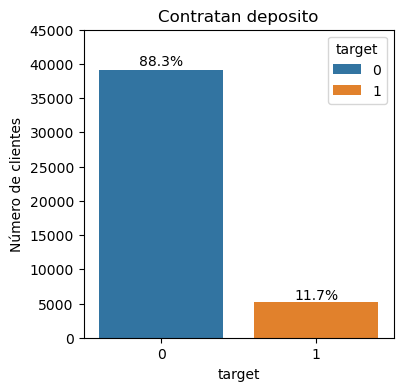

In [19]:
plt.figure(figsize = (4, 4))

sns.countplot(x = data["target"], hue = data["target"])

porcentajes = round(data["target"].value_counts(normalize=True)*100, 1)
for i, v in enumerate(porcentajes):
    plt.text(i , v*445 , str(v)+"%", ha="center", va="bottom")

plt.ylim(0, 45000)
plt.ylabel("Número de clientes")
plt.title("Contratan deposito")
plt.show()

In [20]:
data["target"].value_counts().to_frame().T

target,0,1
count,39069,5187


<span style="font-size:larger;">

Podemos observar como el 88% de los clientes que han participado en la campaña telefónica no han contratado un deposito a plazo fijo. 
    
</span>

<span style="font-size:larger;">
    
Tenemos un set de datos desbalanceado. A la hora de preparar los datos para el modelo predictivo se decidirá entre las siguientes técnicas de balanceo(si aplica):
    
* Undersampling
* Oversampling
* Híbrido

De esta forma se intenta que el modelo no caiga en preferencia por una clase mayoritaria.
</span>

## 4.4. Exploración de variables categoricas

In [21]:
cat_data = data.select_dtypes('object')
cat_data["target"] = data["target"].copy()

In [22]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44256 entries, 0 to 44255
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   trabajo                        44256 non-null  object
 1   estado_civil                   44256 non-null  object
 2   educacion                      42446 non-null  object
 3   tipo_contacto                  31526 non-null  object
 4   resultado_campanas_anteriores  8093 non-null   object
 5   target                         44256 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.0+ MB


<span style="font-size:larger;">
    
Se muestran a continuación el porcentaje de clientes por categoría dentro de cada variable:

</span>

In [457]:
for column in cat_data.columns:
    categorias = round(cat_data[column].value_counts(normalize=True, ascending= False)*100, 2)
    print("------------------------------")
    print(categorias)

------------------------------
trabajo
blue-collar      21.51
management       20.93
technician       16.80
admin.           11.47
services          9.16
retired           5.01
self-employed     3.50
entrepreneur      3.28
unemployed        2.88
housemaid         2.75
student           2.08
unknown           0.63
Name: proportion, dtype: float64
------------------------------
estado_civil
casado        60.22
soltero       28.25
divorciado    11.53
Name: proportion, dtype: float64
------------------------------
educacion
secundaria/superiores    51.32
universitarios           29.43
primaria                 15.16
desconocida               4.09
Name: proportion, dtype: float64
------------------------------
tipo_contacto
movil    90.99
fijo      9.01
Name: proportion, dtype: float64
------------------------------
resultado_campanas_anteriores
sin_exito    59.37
otro         22.34
exito        18.29
Name: proportion, dtype: float64
------------------------------
grupo_edad
adulto    93.08


<span style="font-size:larger;">
    
Visualicemos el número de clientes que hay por categoría y si han contratado o no:

</span>

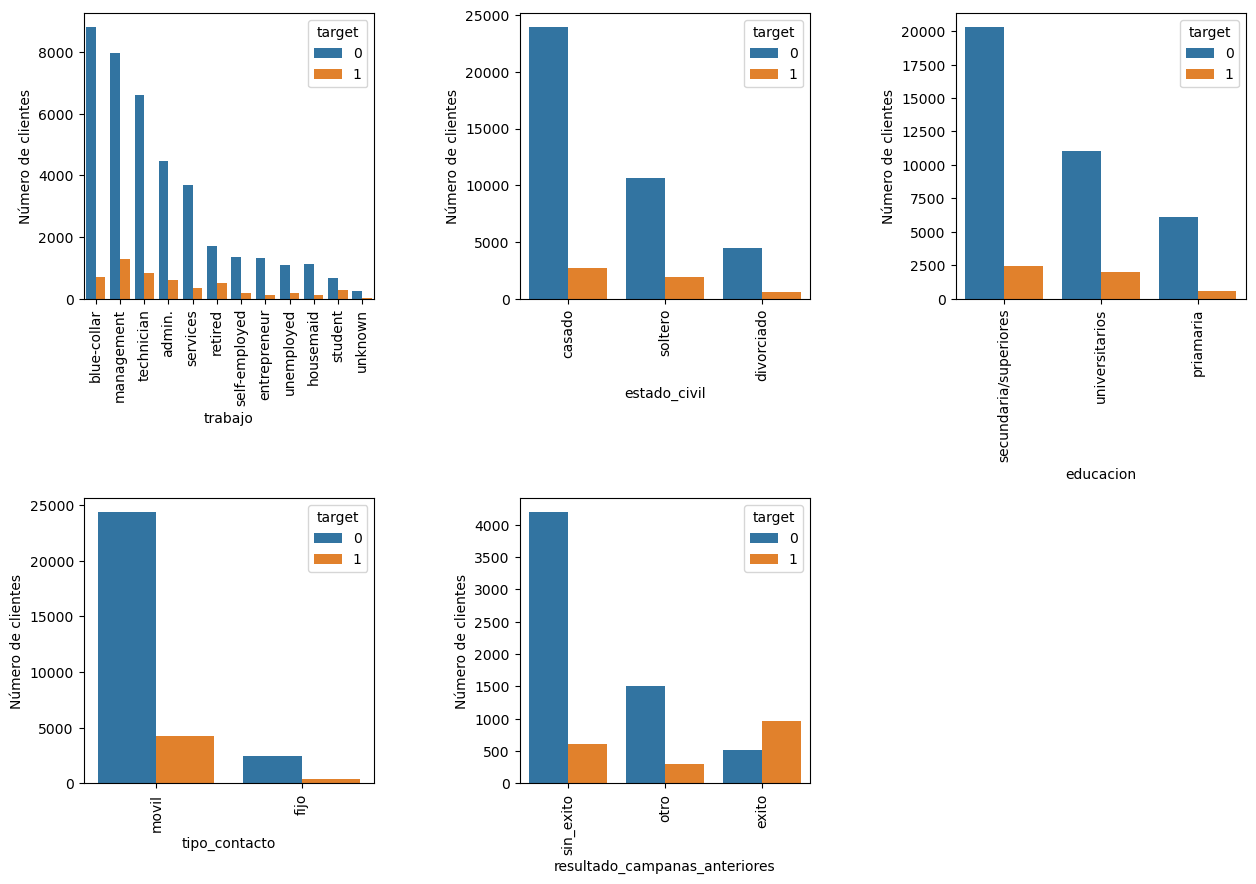

In [98]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize= (15, 10))
plt.subplots_adjust(hspace=0.7, wspace=0.5)
ax = ax.flatten()

# Voy creando los plots con bucle:
for idx, column in enumerate(cat_data.columns[:-1]):
    sns.countplot(x = data[column], hue=cat_data["target"], ax= ax[idx], order = data[column].value_counts().index);
    ax[idx].tick_params(axis='x', rotation=90)
    ax[idx].set_ylabel('Número de clientes')
    
fig.delaxes(ax[-1])
plt.show()  

In [120]:
for col in cat_data.columns[:-1]:
    porcentaje = round(cat_data[cat_data["target"] ==  1].groupby("target")[col].value_counts(normalize=True)*100, 2)
    print(porcentaje)
    print("-------------------------------------------------------")

target  trabajo      
1       management       24.52
        technician       15.96
        blue-collar      13.46
        admin.           11.97
        retired           9.83
        services          6.88
        student           5.11
        unemployed        3.78
        self-employed     3.51
        entrepreneur      2.31
        housemaid         2.01
        unknown           0.66
Name: proportion, dtype: float64
-------------------------------------------------------
target  estado_civil
1       casado          52.17
        soltero         36.05
        divorciado      11.78
Name: proportion, dtype: float64
-------------------------------------------------------
target  educacion            
1       secundaria/superiores    48.67
        universitarios           39.59
        priamaria                11.74
Name: proportion, dtype: float64
-------------------------------------------------------
target  tipo_contacto
1       movil            91.85
        fijo              8.

## Observamos:

<span style="font-size:larger;">
    
* La <u>**mayor parte**</u> de los <u>**clientes**</u> contactados son trabajadores: <u>**blue-collar**</u>, <u>**management**</u> y <u>**technician**</u>, siendo los management el que presenta mayor porcentaje de contratación entre ellos con un 24.5%.
* En cuanto al estado civil <u>**predominan**</u> los <u>**clientes casados**</u>, siendo estos los que más contratan en su grupo, con un 52%.
* El <u>**nivel de estudios mayoritario**</u> es <u>**secundaria/superiores**</u> siendo el 49% de ellos contratantes.
* De los clientes contactados solo el 18% contrató un deposito en la campaña anterior. Observamos como se han perdido clientes que contrataron en la campaña anterior pero se han ganado clientes que no habían contratado o estaban indecisos en la anterior. Notar que en esta variable tenemos un 82% de datos nulos.
* La mayor parte de los contactos han sido por móvil.

</span>

<span style="font-size:larger;">

Veamos donde encontramos más contrataciones:

</span>

## 4.5. Exploración de variables numéricas

In [15]:
num_data = data.select_dtypes('int')

In [29]:
num_data[num_data.columns[:-1]].describe().T

,count,mean,std,min,25%,50%,75%,max
edad,44256.0,40.934856,10.626296,18.0,33.0,39.0,48.00,95.0
deuda,44256.0,0.018054,0.133148,0.0,0.0,0.0,0.00,1.0
saldo,44256.0,1361.455509,3053.362628,-8019.0,72.0,447.0,1424.25,102127.0
vivienda,44256.0,0.556015,0.496858,0.0,0.0,1.0,1.00,1.0
prestamo,44256.0,0.160566,0.367134,0.0,0.0,0.0,0.00,1.0
duracion,44256.0,258.320906,257.668451,0.0,103.0,180.0,319.00,4918.0
campaign,44256.0,2.761004,3.093201,1.0,1.0,2.0,3.00,63.0
tiempo_transcurrido,44256.0,40.259739,100.127699,-1.0,-1.0,-1.0,-1.00,871.0
contactos_anteriores,44256.0,0.581593,2.314184,0.0,0.0,0.0,0.00,275.0


## Observamos:

<span style="font-size:larger;">
    
* El 1.8% de los clientes contactados tiene deuda.
* El 55.6% de los clientes es propietario de al menos un inmueble.
* El 16% tiene un prestamo.
* Se observan valores negativos en saldo. **Investigar** --> Pueden ser errores o deuda pendiente(Preguntar).

</span>

## --> <u>Distribuciones:</u>

<span style="font-size:larger;">
    
* #### Edad:
    
</span>

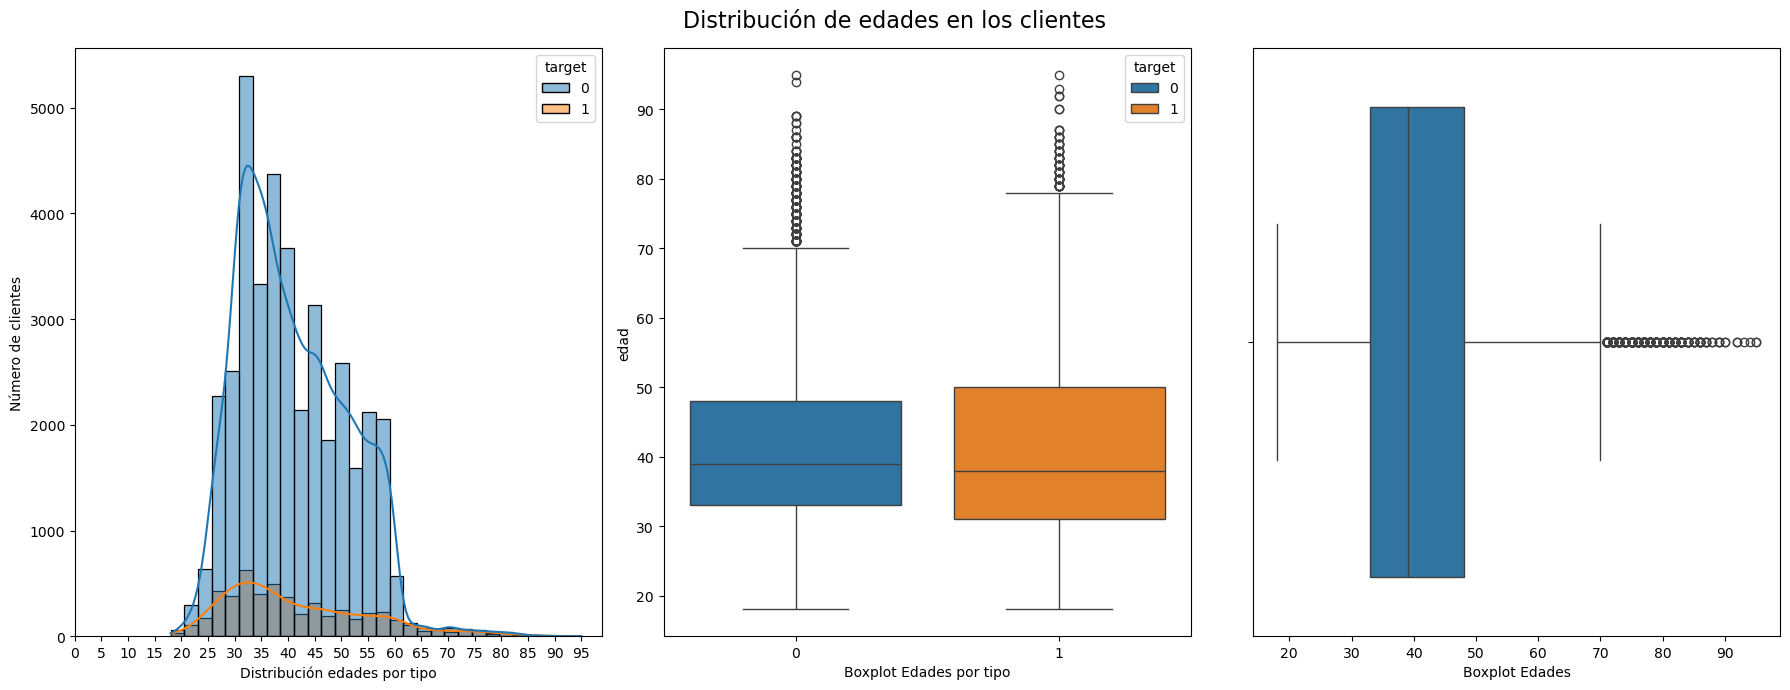

In [120]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

sns.histplot(x = num_data["edad"], bins = 30, hue = num_data["target"], kde = True, ax = ax[0])
ax[0].xaxis.set_ticks(np.arange(0, 100, 5))
ax[0].set_xlabel("Distribución edades por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data["edad"], x = num_data["target"], hue = num_data["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot Edades por tipo")

sns.boxplot(x = num_data["edad"], ax = ax[2])
ax[2].set_xlabel("Boxplot Edades")

fig.suptitle("Distribución de edades en los clientes", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">
    
Se observa que la <u>**edad**</u> de la <u>**mayor parte**</u> de los clientes se encuentra entre los <u>**25 y los 60 años**</u>.
    
Podemos apreciar en el boxplot del centro como hay una <u>**menor edad**</u> en clientes que <u>**contratan**</u> con respecto a los que no.
    
</span>

<span style="font-size:larger;">
    
* #### Saldo:
    
</span>

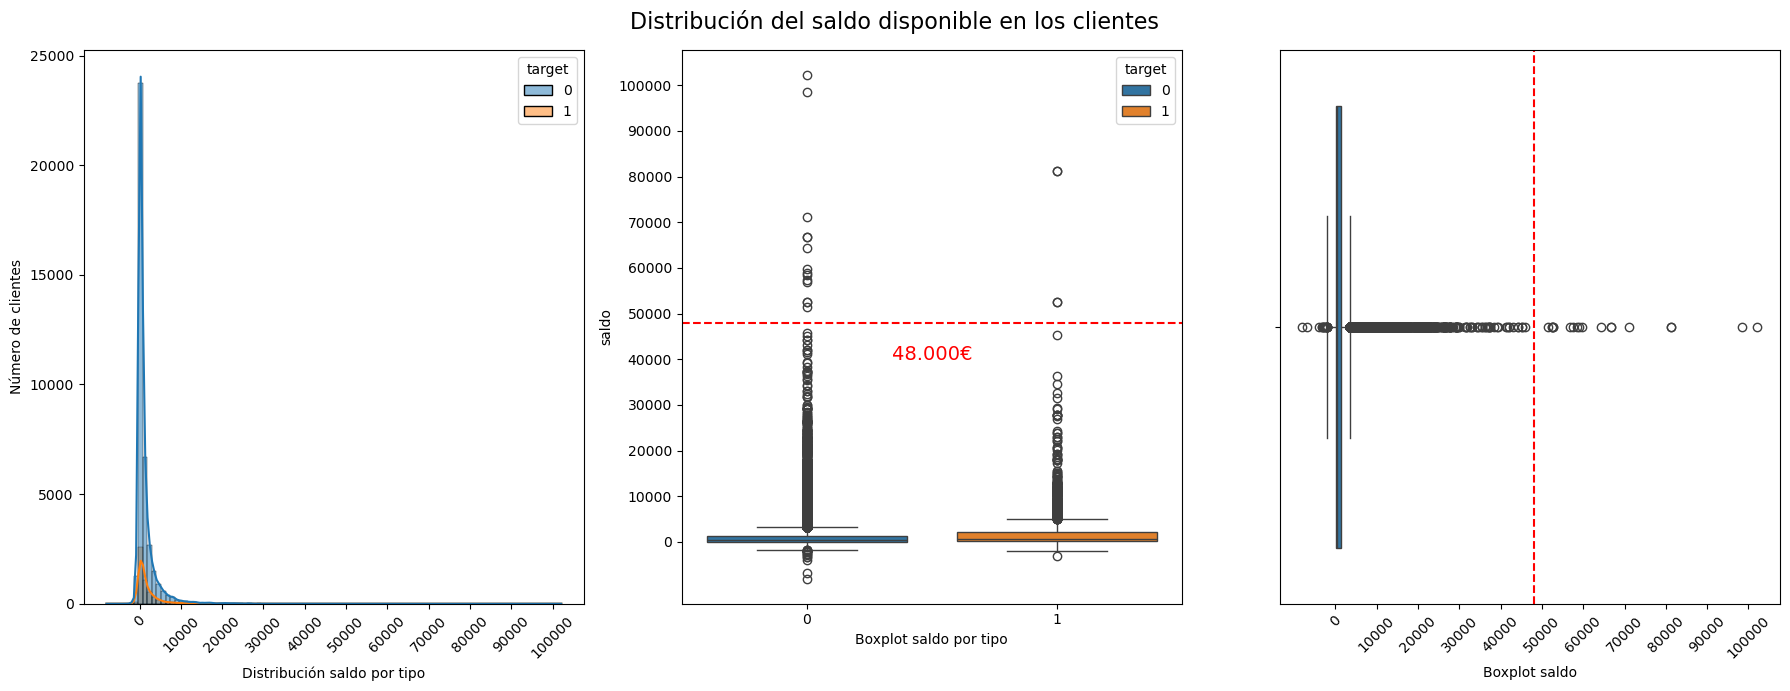

In [289]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

sns.histplot(x = num_data["saldo"], bins = 100, hue = num_data["target"], kde = True, ax = ax[0])
ax[0].xaxis.set_ticks(np.arange(0, 110000, 10000))
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel("Distribución saldo por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data["saldo"], x = num_data["target"], hue = num_data["target"], ax = ax[1])
ax[1].yaxis.set_ticks(np.arange(0, 110000, 10000))
ax[1].axhline(y=48000, color="red", linestyle="--")
ax[1].text(0.5, 0.45, "48.000€", horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=14, color= "red")
ax[1].set_xlabel("Boxplot saldo por tipo")

sns.boxplot(x = num_data["saldo"], ax = ax[2])
ax[2].xaxis.set_ticks(np.arange(0, 110000, 10000))
ax[2].axvline(x=48000, color="red", linestyle="--")
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_xlabel("Boxplot saldo")

fig.suptitle("Distribución del saldo disponible en los clientes", fontsize=16)
plt.tight_layout()
plt.show()

<span style="font-size:larger;">
    
<u>**Observamos valores negativos**</u>, estos pueden deberse a un error o ser deuda pendiente, investiguemos un poco más:
    
</span>

In [254]:
data[data["saldo"] < 0]["deuda"].value_counts()

deuda
0    3255
1     431
Name: count, dtype: int64

<span style="font-size:larger;">

Deberían estar catalogados como deuda pero no lo están --> <u>**Aclarar**</u>

</span>

<span style="font-size:larger;">
    
Volviendo al gráfico de distribución de saldo podríamos <u>**eliminar outliers**</u> ya que, a partir de 48.000€, podemos ver como hay muchos más clientes que no contraran y presentan grandes saldos con respecto al resto.
    
Dado que tenemos datos con mucha dispersión usaremos una transformación logaritmica para visualizar mejor la distribución. Para ello <u>**no se visualizarán los clientes con saldo negativo.**</u>
    
</span>

In [124]:
num_data["saldo_log"] = num_data["saldo"].apply(lambda x : np.log(x+1))

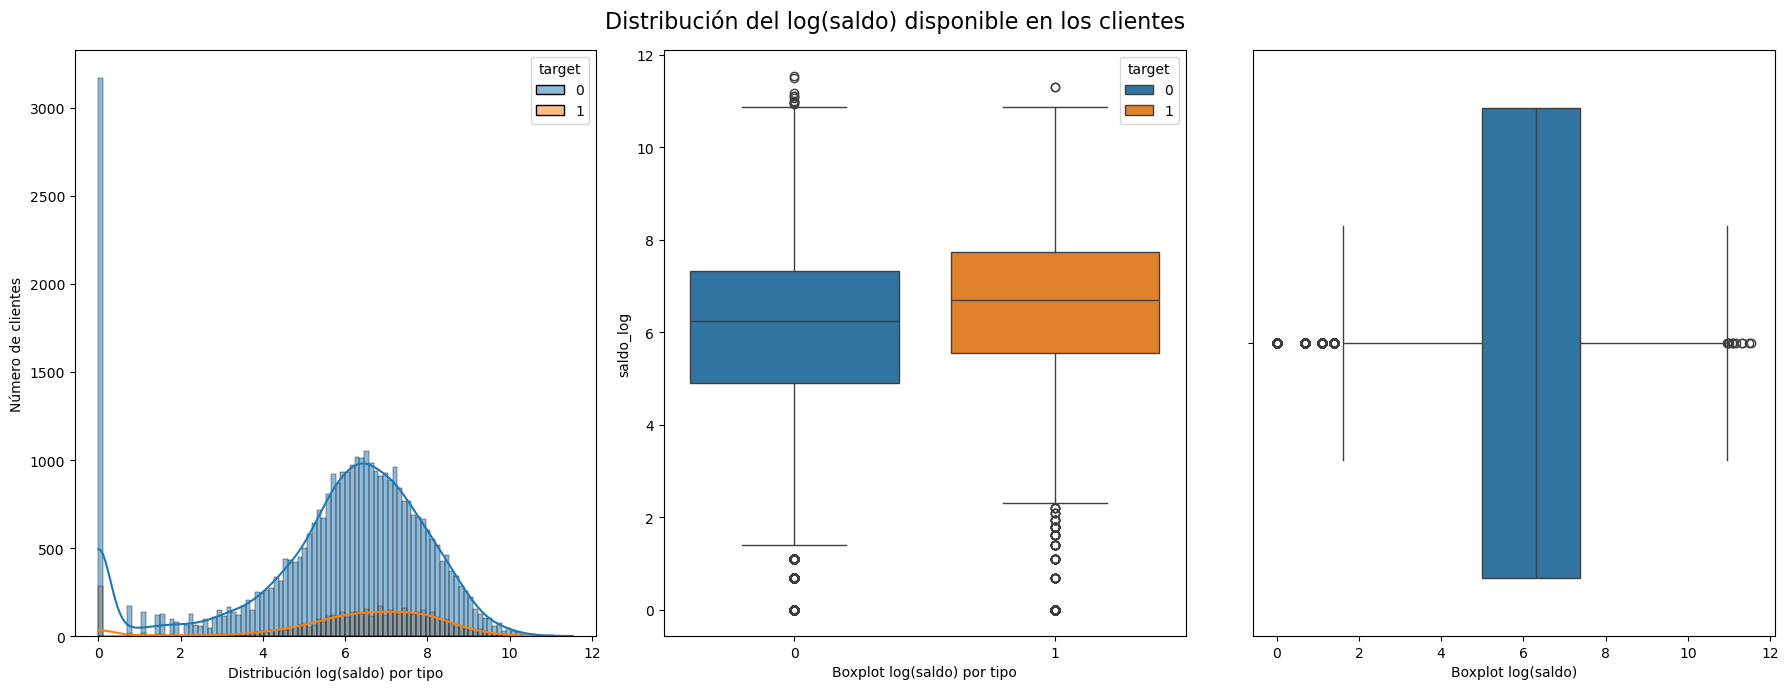

In [125]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

sns.histplot(x = num_data["saldo_log"], bins = 100, hue = num_data["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución log(saldo) por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data["saldo_log"], x = num_data["target"], hue = num_data["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot log(saldo) por tipo")

sns.boxplot(x = num_data["saldo_log"], ax = ax[2])
ax[2].set_xlabel("Boxplot log(saldo)")

fig.suptitle("Distribución del log(saldo) disponible en los clientes", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">

Se aprecia como los clientes que contratan depósitos parecen mantener mayor saldo en su cuenta con respecto a los que no lo hacen. Esto lo observamos tanto en el boxplot central como en la distribución, presentando esta un leve desplazamiento hacia salarios altos.
    
    
Se observa una gran cantidad de clientes sin saldo en su cuenta. Veamos si presentan claras diferencias con los clientes con saldo a la hora de contratar un depósito:
    
</span>

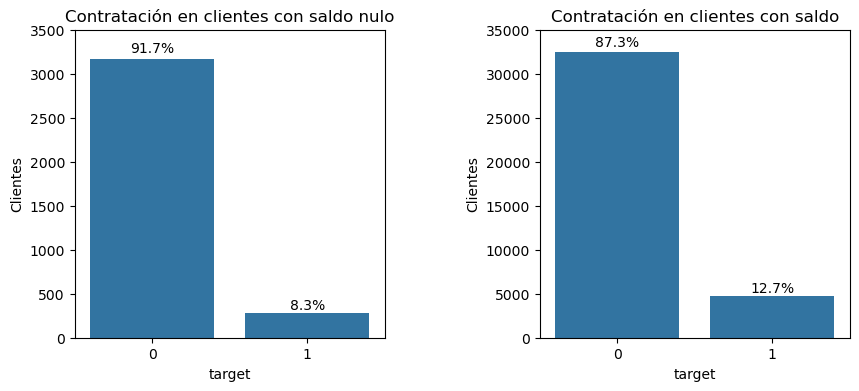

In [20]:
saldo_nulo = data[data["saldo"] == 0]
saldo = data[data["saldo"] > 0]

fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (10, 4))
plt.subplots_adjust(hspace=0.7, wspace=0.5)
ax = ax.flatten()

# Sin saldo
sns.countplot(x = saldo_nulo["target"], ax= ax[0])
ax[0].set_ylim(0, 3500)    
ax[0].set_ylabel("Clientes")

porcentajes = round(saldo_nulo["target"].value_counts(normalize=True)*100, 1)
for i, v in enumerate(porcentajes):
    ax[0].text(i , v*35 , str(v)+"%", ha="center", va="bottom")
    
ax[0].set_title("Contratación en clientes con saldo nulo")


# Con saldo    
sns.countplot(x = saldo["target"], ax= ax[1])
ax[1].set_ylim(0, 35000)    
ax[1].set_ylabel("Clientes")

porcentajes = round(saldo["target"].value_counts(normalize=True)*100, 1)
for i, v in enumerate(porcentajes):
    ax[1].text(i , v*375 , str(v)+"%", ha="center", va="bottom")
    
ax[1].set_title("Contratación en clientes con saldo")


plt.show()

<span style="font-size:larger;">
    
Podemos observar como los clientes <u>**sin saldo contratan menos**</u> que los que tienen.
    
</span>

<span style="font-size:larger;">
    
* #### Duración:
    
Aqui exploraremos la duración en segundos de las últimas llamadas (donde se gana o pierde un cliente).
    
</span>

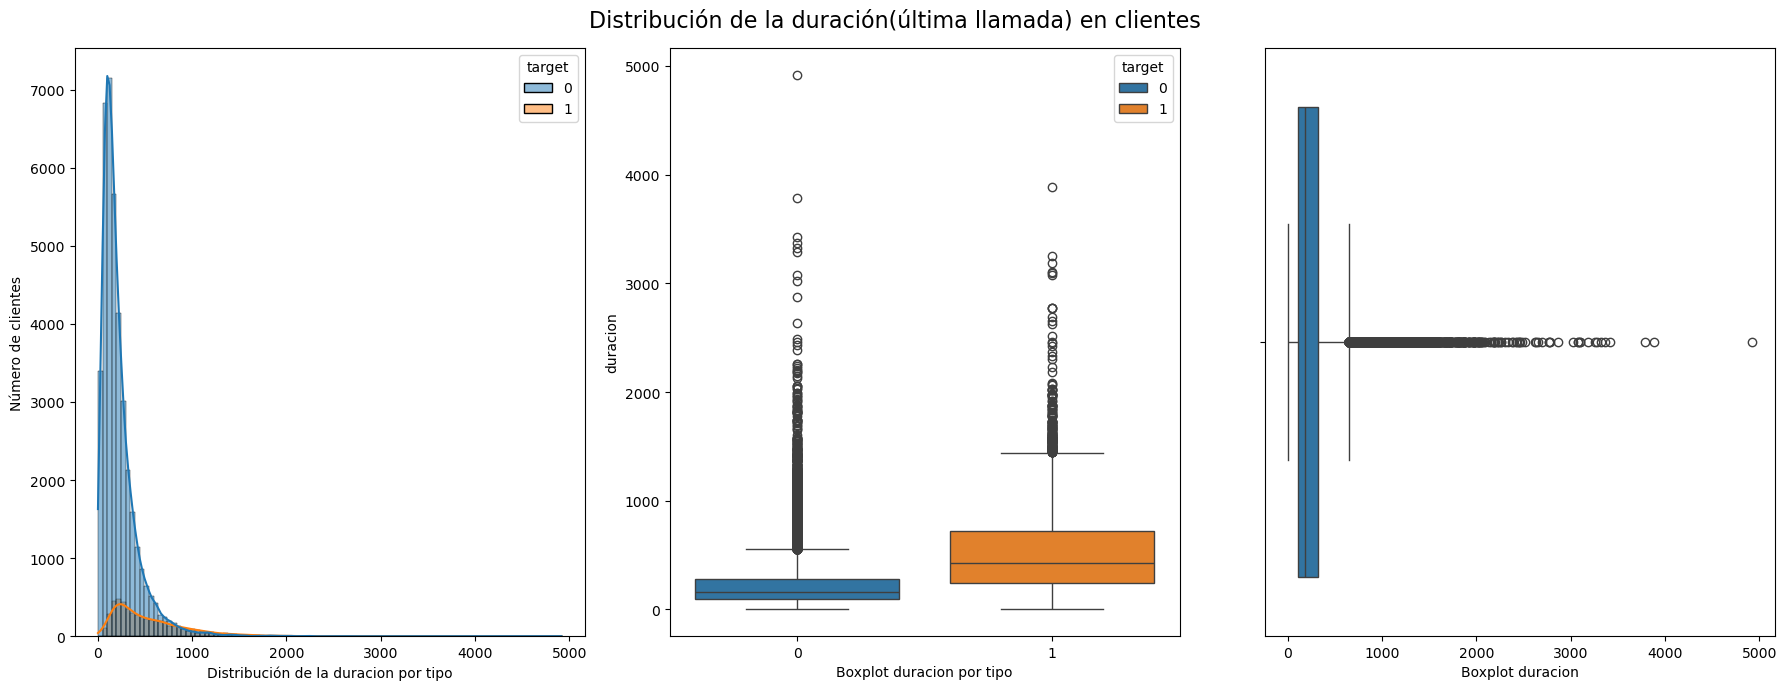

In [126]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

sns.histplot(x = num_data["duracion"], bins = 100, hue = num_data["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución de la duracion por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data["duracion"], x = num_data["target"], hue = num_data["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot duracion por tipo")

sns.boxplot(x = num_data["duracion"], ax = ax[2])
ax[2].set_xlabel("Boxplot duracion")

fig.suptitle("Distribución de la duración(última llamada) en clientes", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">
    
Se observa con claridad como los <u>**clientes que contratan**</u> han pasado <u>**más tiempo en la última llamada**</u>. Se presentan también algunas llamadas con gran duración, se podrían considerar outliers.
    
</span>

<span style="font-size:larger;">
    
* #### Campaña:
    
Veamos como se distribuye el número de veces que se ha contactado con cada cliente en esta campaña:
    
</span>

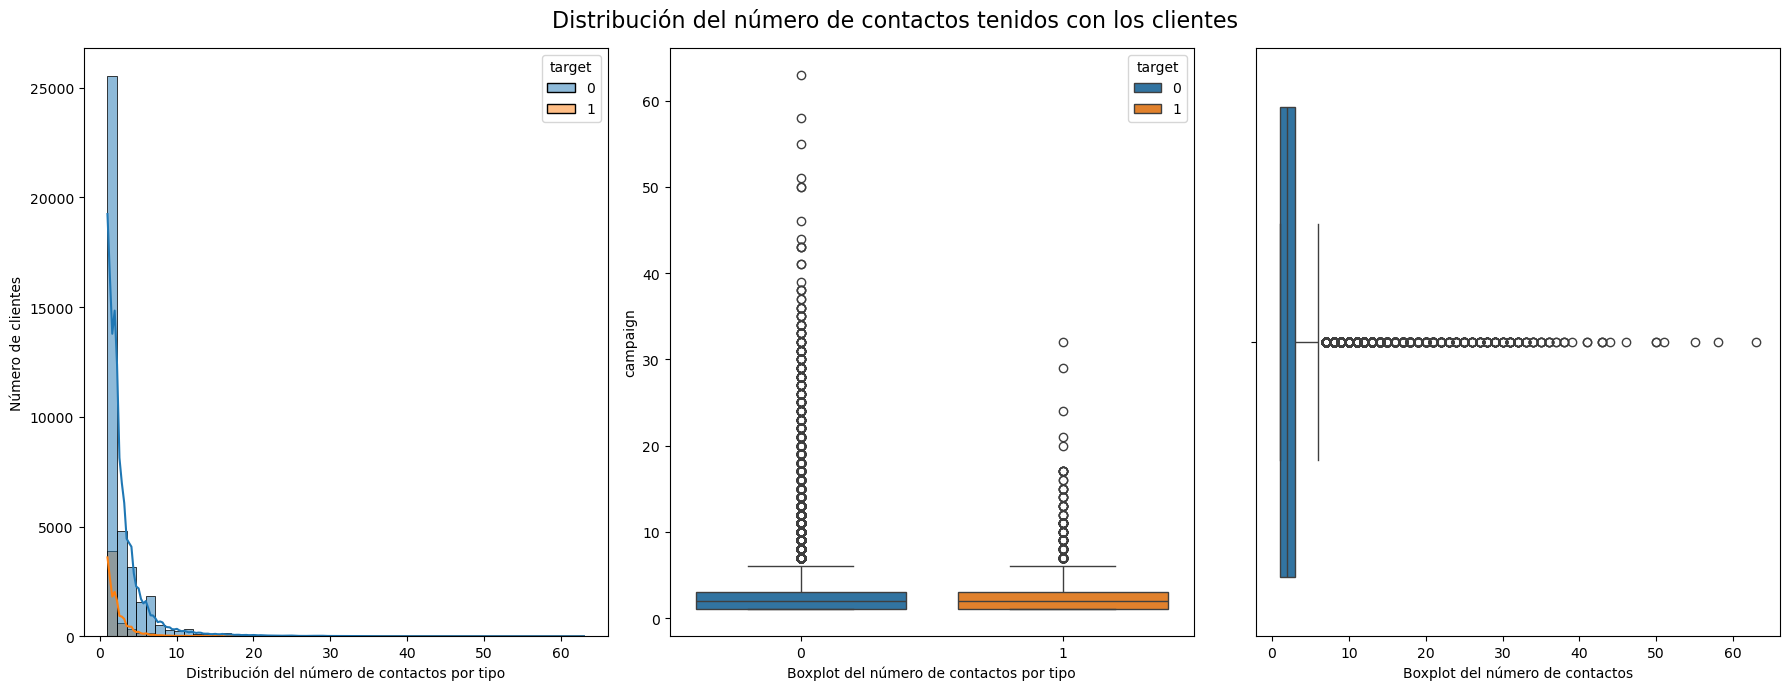

In [128]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

sns.histplot(x = num_data["campaign"], bins = 50, hue = num_data["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución del número de contactos por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data["campaign"], x = num_data["target"], hue = num_data["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot del número de contactos por tipo")

sns.boxplot(x = num_data["campaign"], ax = ax[2])
ax[2].set_xlabel("Boxplot del número de contactos")

fig.suptitle("Distribución del número de contactos tenidos con los clientes", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">
    
* #### Tiempo transcurrido:
    
Aqui veremos la distribución de los días que han transcurrido desde la última llamada, excluyendo los que no fueron contactados previamente (valor -1):
    
</span>

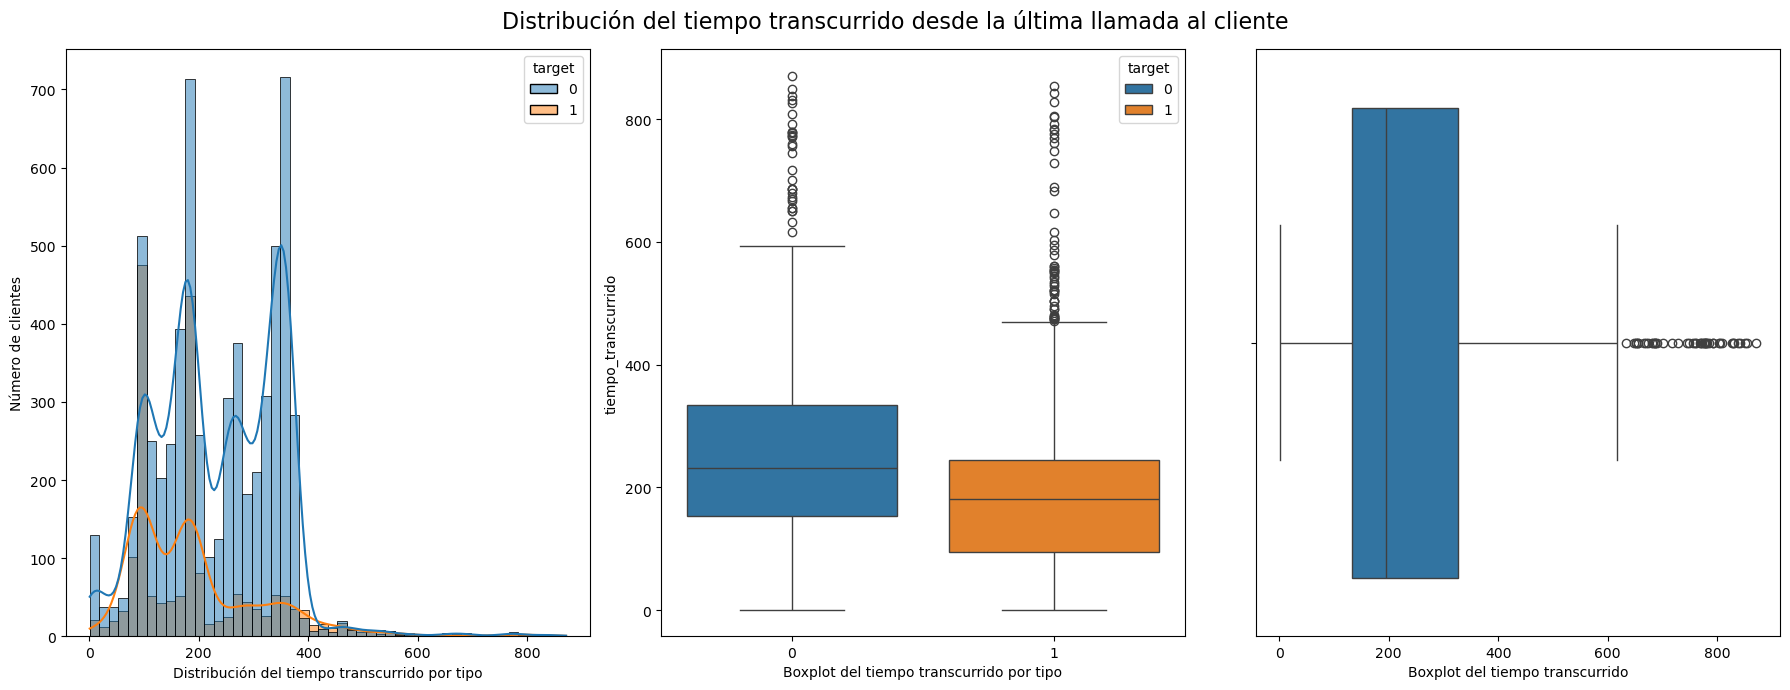

In [256]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

mask_tiempo = (num_data["tiempo_transcurrido"] > 0)

sns.histplot(x = num_data[mask_tiempo]["tiempo_transcurrido"], bins = 50, hue = num_data[mask_tiempo]["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución del tiempo transcurrido por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data[mask_tiempo]["tiempo_transcurrido"], x = num_data[mask_tiempo]["target"], hue = num_data[mask_tiempo]["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot del tiempo transcurrido por tipo")

sns.boxplot(x = num_data[mask_tiempo]["tiempo_transcurrido"], ax = ax[2])
ax[2].set_xlabel("Boxplot del tiempo transcurrido")

fig.suptitle("Distribución del tiempo transcurrido desde la última llamada al cliente", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">

Se observa que para los clientes que no acaban contratando los depositos transcurren una mayor cantidad de días tras el último contacto, no así para los que contratan que son contactados con más prontitud.

</span>

<span style="font-size:larger;">
    
* #### Contactos anteriores:
    
No se tendrán en cuenta los clientes que no hayan sido contactados para campañas anteriores:
    
</span>

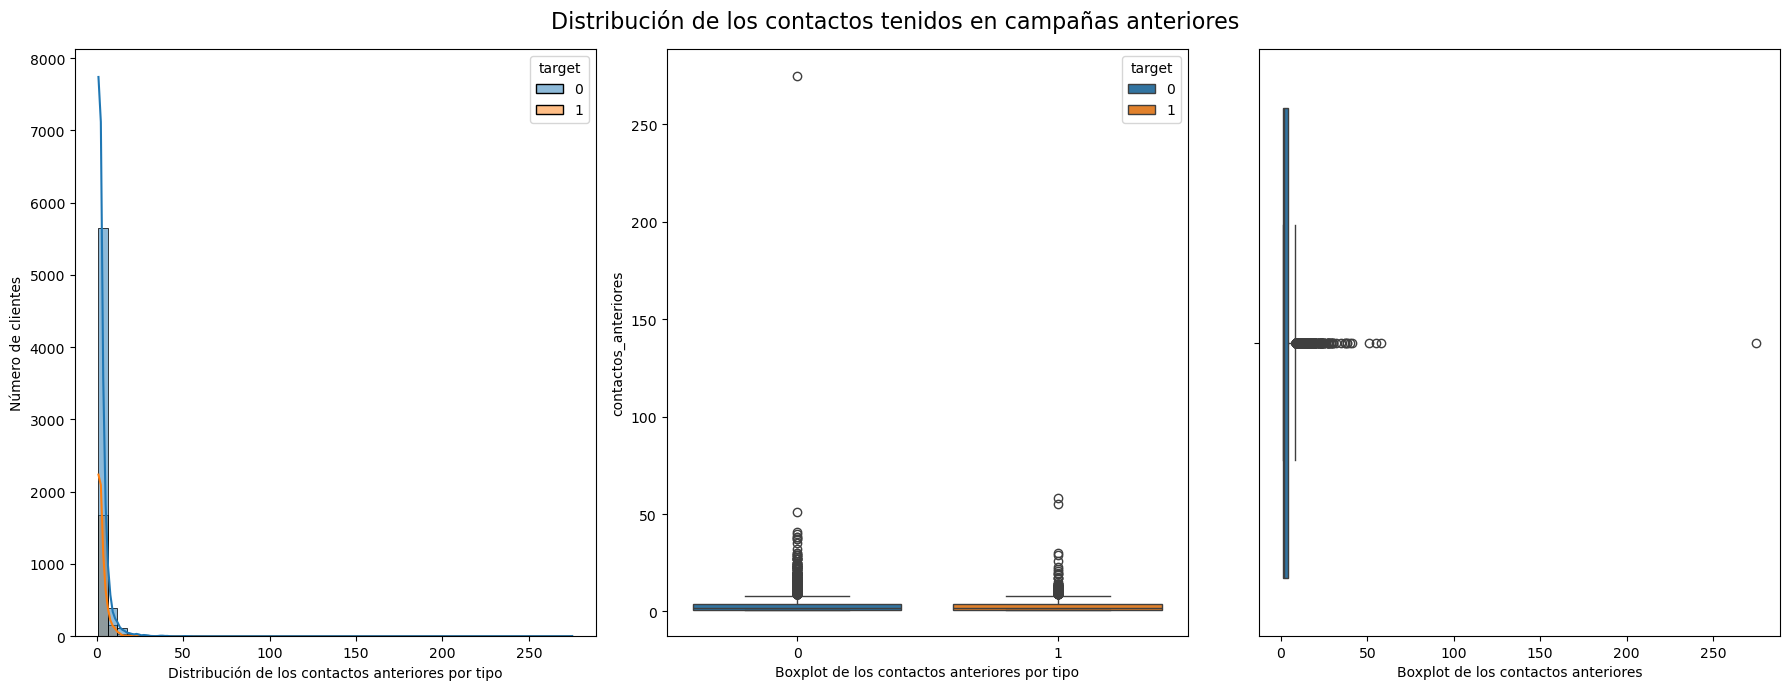

In [259]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

mask_contactos = (num_data["contactos_anteriores"] > 0)

sns.histplot(x = num_data[mask_contactos]["contactos_anteriores"], bins = 50, hue = num_data[mask_contactos]["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución de los contactos anteriores por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data[mask_contactos]["contactos_anteriores"], x = num_data[mask_contactos]["target"], hue = num_data[mask_contactos]["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot de los contactos anteriores por tipo")

sns.boxplot(x = num_data[mask_contactos]["contactos_anteriores"], ax = ax[2])
ax[2].set_xlabel("Boxplot de los contactos anteriores")

fig.suptitle("Distribución de los contactos tenidos en campañas anteriores", fontsize=16)
plt.tight_layout() 
plt.show()

<span style="font-size:larger;">

Se observa un valor que distorsiona el gráfico, vamos a quitarlo:
</span>

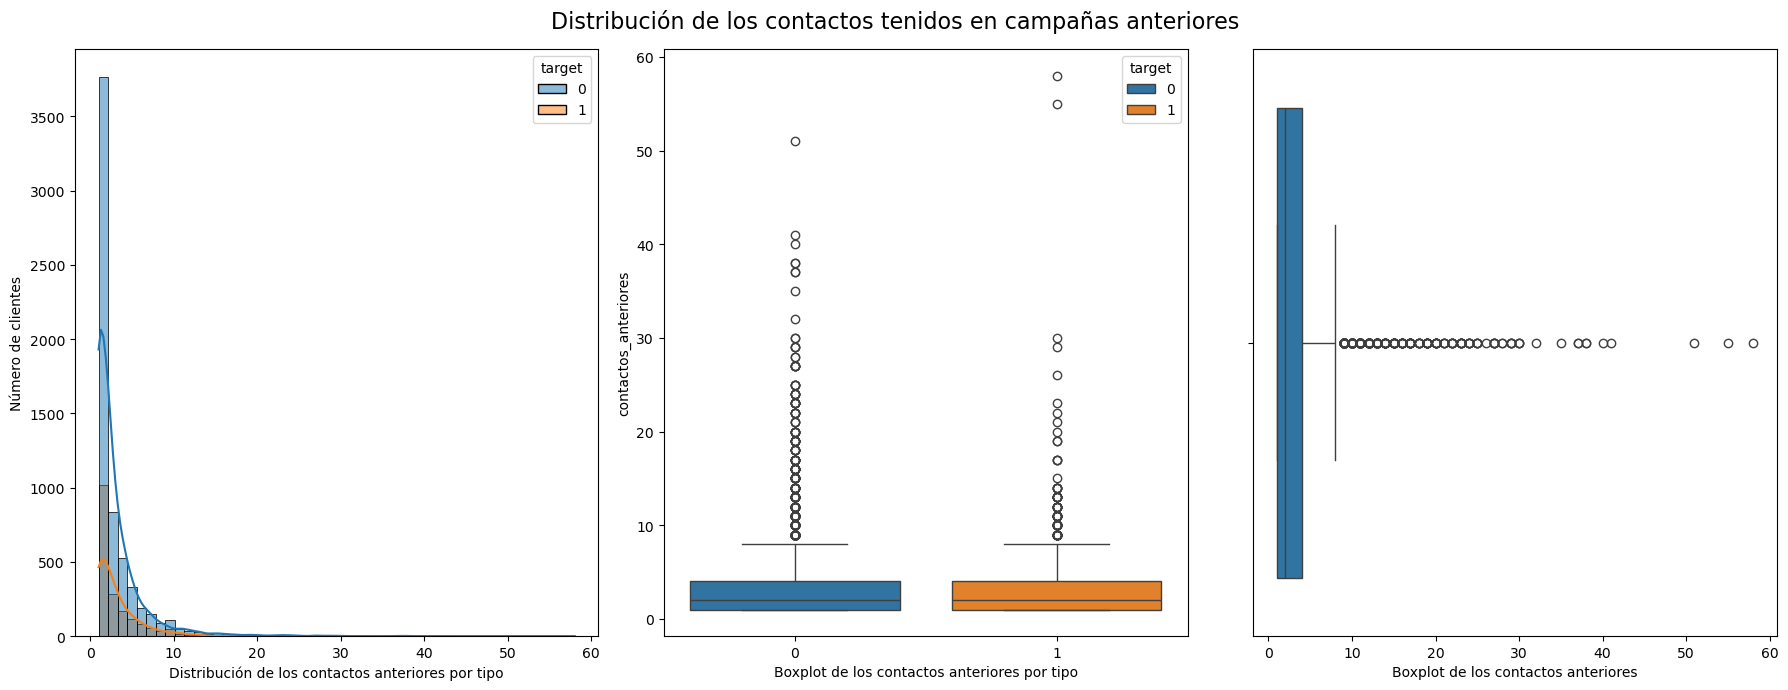

In [261]:
fig, ax = plt.subplots(1, 3, figsize = (18, 7))
ax = ax.flatten()

mask_contactos = ((num_data["contactos_anteriores"] > 0) & (num_data["contactos_anteriores"] < 100))

sns.histplot(x = num_data[mask_contactos]["contactos_anteriores"], bins = 50, hue = num_data[mask_contactos]["target"], kde = True, ax = ax[0])
ax[0].set_xlabel("Distribución de los contactos anteriores por tipo")
ax[0].set_ylabel("Número de clientes")

sns.boxplot(y = num_data[mask_contactos]["contactos_anteriores"], x = num_data[mask_contactos]["target"], hue = num_data[mask_contactos]["target"], ax = ax[1])
ax[1].set_xlabel("Boxplot de los contactos anteriores por tipo")

sns.boxplot(x = num_data[mask_contactos]["contactos_anteriores"], ax = ax[2])
ax[2].set_xlabel("Boxplot de los contactos anteriores")

fig.suptitle("Distribución de los contactos tenidos en campañas anteriores", fontsize=16)
plt.tight_layout() 
plt.show()

## --> <u>Variables booleanas</u>

<span style="font-size:larger;">
    

    
</span>

In [53]:
bool_columns = ["deuda", "vivienda", "prestamo", "target"]
bool_data = num_data[bool_columns]

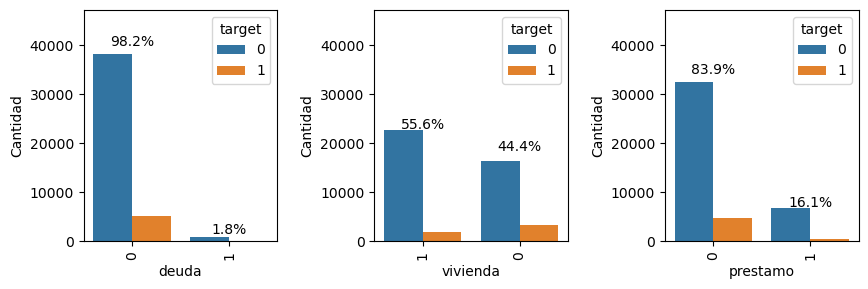

In [85]:
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize= (10, 3))
plt.subplots_adjust(hspace=0.7, wspace=0.5)
ax = ax.flatten()

# Voy creando los plots con bucle:
for idx, column in enumerate(bool_data.columns[:-1]):
    sns.countplot(x = bool_data[column], hue= bool_data["target"], ax= ax[idx], order = bool_data[column].value_counts().index);
    ax[idx].tick_params(axis="x", rotation=90)
    ax[idx].set_ylabel("Cantidad")
    porcentajes = round(bool_data[column].value_counts(normalize=True)*100, 1)
    for i, v in enumerate(porcentajes):
        ax[idx].text(i , v*400 , str(v)+"%", ha="center", va="bottom")
    ax[idx].set_ylim(0, bool_data[column].count() + 3000)
    
plt.show() 

In [92]:
bool_data.groupby(["deuda", "vivienda", "prestamo", "target"]).size().unstack()

target                       0     1
deuda vivienda prestamo             
0     0        0         13558  3053
               1          2456   210
      1        0         18412  1621
               1          3894   253
1     0        0           194    14
               1           156     8
      1        0           276    22
               1           123     6

<span style="font-size:larger;">
    
Se infiere de los gráficos que:
    
* El **1.8%** de los clientes **tienen deuda**.
* El **55% tiene** al menos un inmueble en **propiedad**
* El **16% tiene** un **prestamo** contratado
    
Observamos también que hay un <u>**perfil**</u> de clientes con <u>**mayor contratación**</u>:

* Clientes <u>**sin deuda**</u>, <u>**sin inmuebles**</u> y <u>**sin prestamos**</u>.
    
</span>

## --> <u>**Análisis de dispersión**</u>

<span style="font-size:larger;">
Veamos si se presentan grupos diferenciados:
</span>

In [266]:
variables_disp = ["edad", "saldo", "duracion", "campaign", "tiempo_transcurrido", "contactos_anteriores", "target"]

# Quitamos el valor extemo en contactos_anteriores:

mask_contactos_anteriores = (num_data["contactos_anteriores"] < 100)

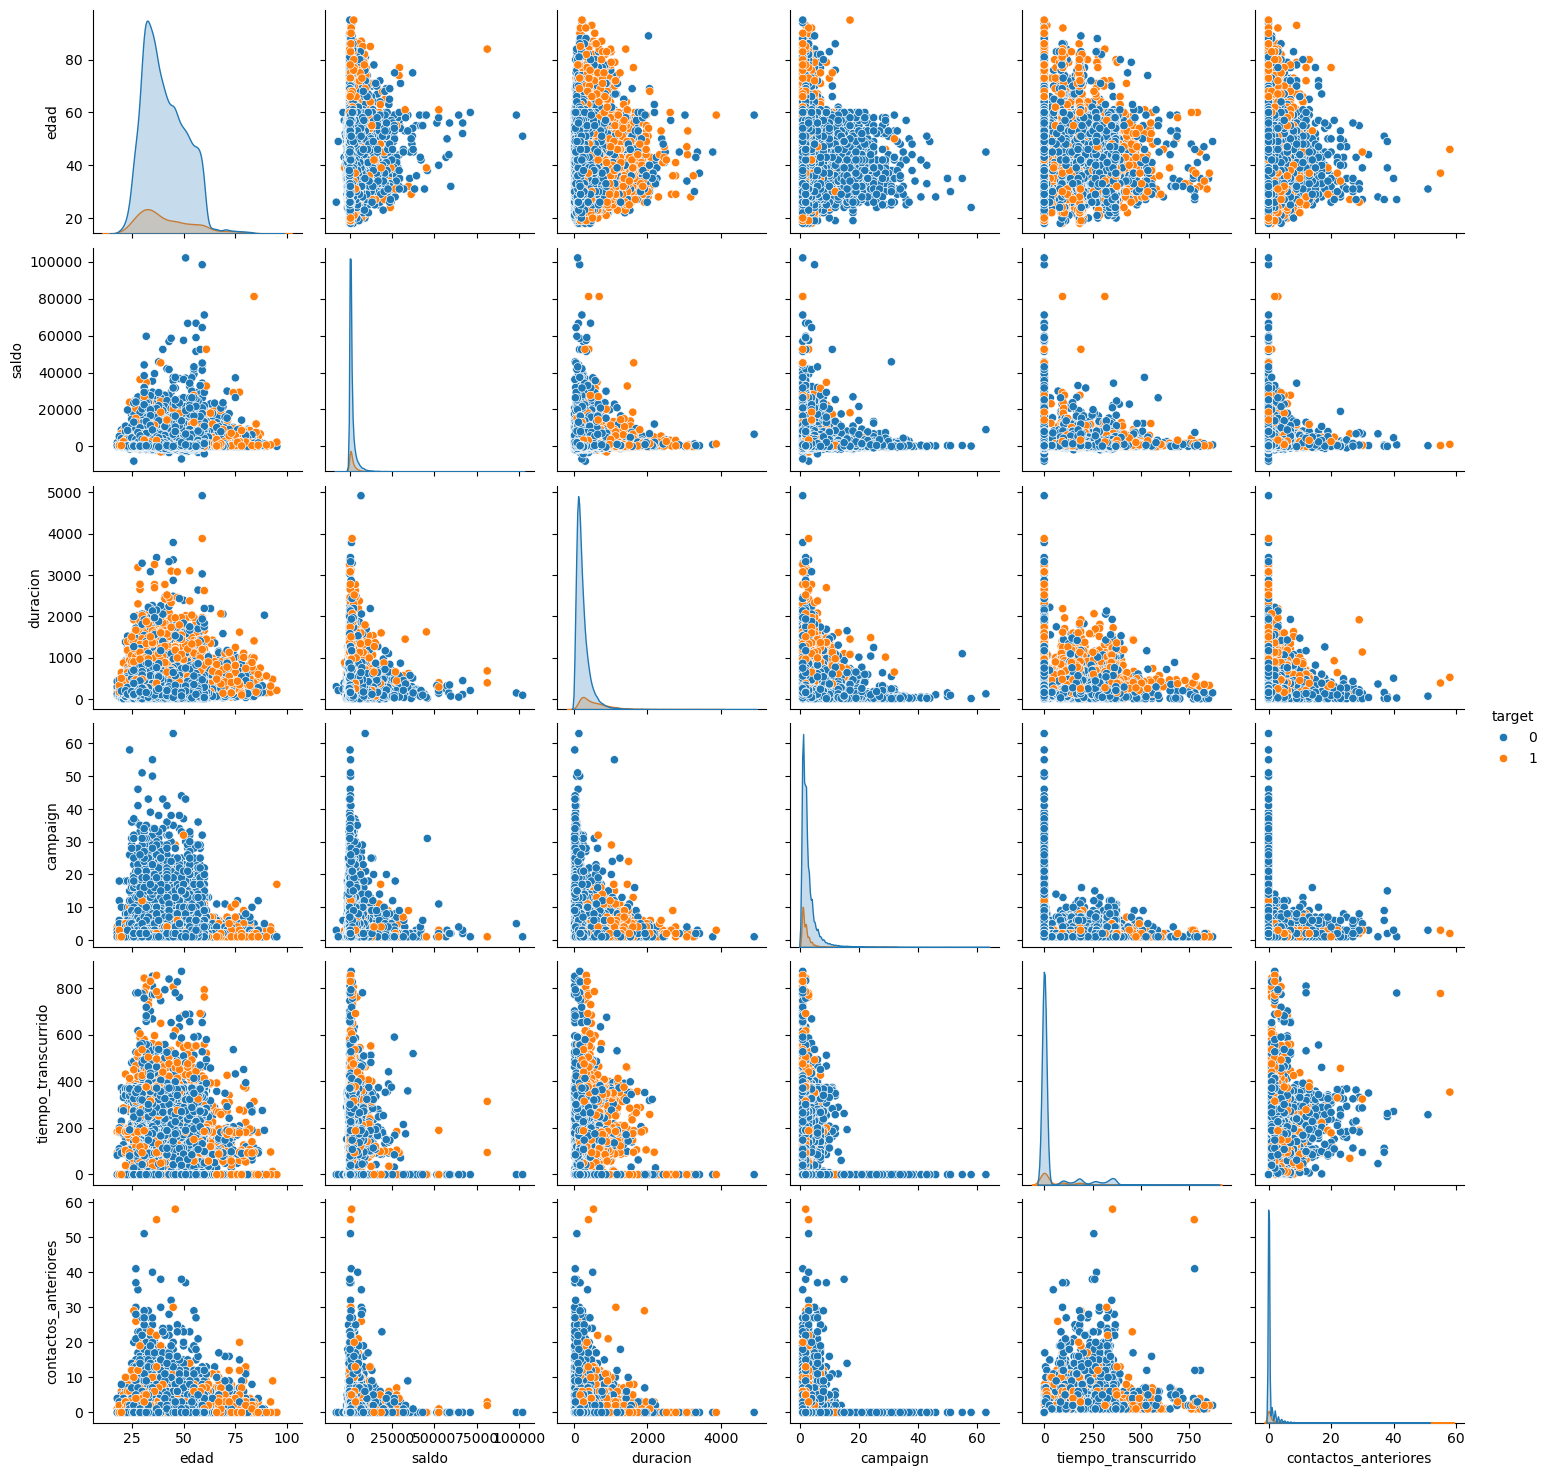

In [267]:
sns.pairplot(data = num_data[mask_contactos_anteriores][variables_disp], hue = "target")
plt.show()

## Inferencias:

<span style="font-size:larger;">
    
* **Saldo**
    - Parece observarse una <u>mayor contratación en saldos más bajos</u>, esto puede deberse a que mayores saldos alojan capital en depositos/activos con mayor riesgo y remuneración por poseer mayor sofisticación financiera ([Referencia](https://www.youtube.com/watch?v=bWsT0HnA0Ug&ab_channel=JuanRam%C3%B3nRallo))
    - Se aprecian <u>saldos negativos</u> --> **Investigar** si estos pueden ser errores o son deuda.<br><br>
    
* **Edad** (joven<=25 || 26<adulto<59 || mayor>=60)
    - Parece observarse una <u>mayor contratación en personas mayores con saldo bajo</u> (grupo recurrente).
    - Se observa un <u>menor tiempo de llamada y contacto en personas mayores y jovenes</u>.
    - Se observa una <u>mayor cantidad de llamadas a adultos</u> para tratar de ganar contrataciones (<u>grupo de interés</u>). **Analizar**
    - Parece que <u>jovenes y mayores contratan más rapidamente tras contacto</u> que adultos.<br><br>

</span>

# 5. Análisis exploratorio de datos por grupo

<span style="font-size:larger;">
En esta sección analizaremos en detalle que tipo de clientes contratan los depositos a plazo fijo. Esto nos permitirá hacernos una idea del perfil de estos clientes para seleccionarlos en futuras campañas y ahorrar costes.<br><br>
    
Para ello vamos a centrar el análisis en los grupo de edad:
* Estudiaremos que grupo proporciona mayores ingresos y la tasa de éxito de cada uno.
    
* Analizaremos cada grupo por separado, identificando los diferentes perfiles.
    
* Realizaremos un análisis de clustering para determinar si encontramos similitudes con el resultado del punto anterior, ganando confianza en los grupos de interes identificados.
</span>

## 5.1. Preparación del dataset

<span style="font-size:larger;">
    
Vamos a visualizar el histograma del número de contactos y clientes para seleccionar los intervalos de edad:
    
    
</span>

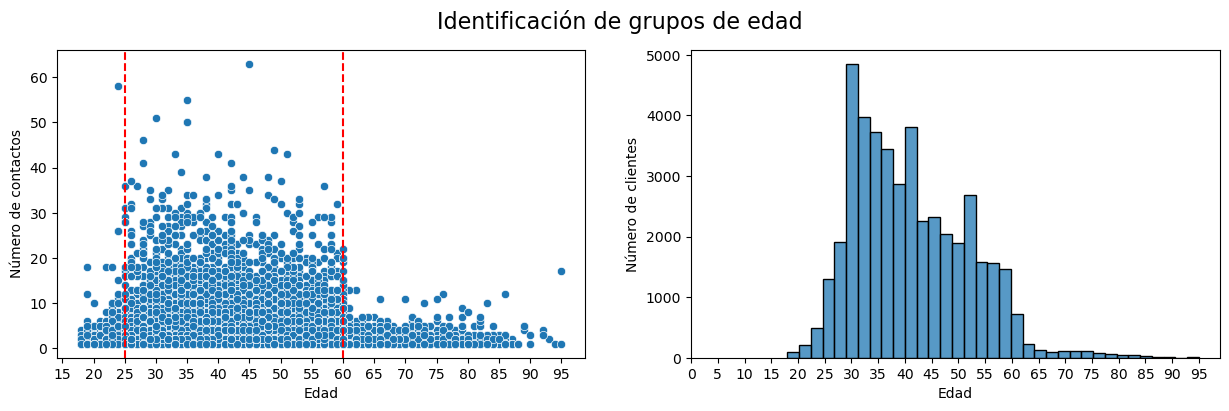

In [268]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (15, 4))
#plt.subplots_adjust(hspace=0.7, wspace=0.5)
ax = ax.flatten()

# Histograma número de contactos
sns.scatterplot(x= data["edad"], y= data["campaign"], ax= ax[0])
ax[0].axvline(x=25, color="red", linestyle="--")
ax[0].axvline(x=60, color="red", linestyle="--")

ax[0].set_xlabel("Edad")
ax[0].xaxis.set_ticks(np.arange(15, 100, 5))
ax[0].set_ylabel("Número de contactos")

# Histograma edades
sns.histplot(data["edad"], bins= 35, ax= ax[1])
ax[1].set_xlabel("Edad")
ax[1].xaxis.set_ticks(np.arange(0, 100, 5))
ax[1].set_ylabel("Número de clientes")

fig.suptitle("Identificación de grupos de edad", fontsize=16)
    
plt.show()

<span style="font-size:larger;">
    
Observamos como se dirige un esfuerzo en captar clientes en edades comprendidas entre 25 y 60 años estableciendo un mayor número de contactos para tratar de conseguir contrataciones. Esto es lógico ya que la mayor parte de la población española activa está en este grupo y por tanto ha de intentarse máximizar el número de clientes en este grupo más extenso y diverso.
    
<div style="position: relative; text-align: center;">
  <img src="utiles/imagenes/grupos_edad.png" alt="INE" width="60%">
  <p style="position: absolute; bottom: 0; right: 0; font-size: 15px; color: #F5CFB3;">Instituto Nacional de Estadística</p>
</div> <br><br>
    
Estudiaremos en los apartados siguientes las carácteristicas en cada grupo, para ello se establecen los siguientes <u>**criterios de diferenciación de grupos**</u>:
* <u>Jovenes</u>: edades <u>menores o iguales a 25 años</u>.
* <u>Adultos</u>: edades comprendidas <u>entre 26 y 59 años</u>.
* <u>Mayores</u>: edades <u>mayores o iguales a 60 años</u>.

</span>

<span style="font-size:larger;">
    
Creamos una nueva columna "grupo_edad" con los criterios mencionados.
    
</span>

In [16]:
data["grupo_edad"] = data["edad"].apply(lambda x: "joven" if x <= 25 else ("adulto" if 25 < x < 60 else "mayor"))

## 5.2. Análisis de la tasa de éxito

<span style="font-size:larger;">
    
Comenzaremos por visualizar la <u>**cantidad de clientes**</u> que tenemos en cada <u>**grupo**</u>:

</span>

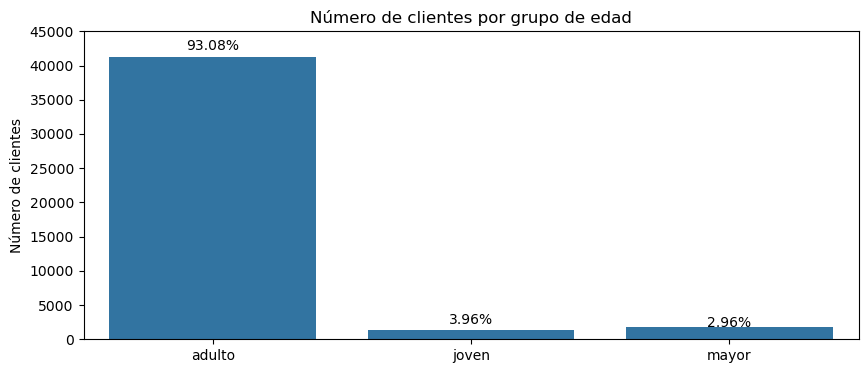

In [241]:
fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 4))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

sns.countplot(x = data["grupo_edad"], ax = ax);
ax.set_xlabel("")
ax.set_ylabel("Número de clientes")
ax.set_ylim(0, 45000)

porcentajes = round(data["grupo_edad"].value_counts(normalize=True)*100, 2)
for i, v in enumerate(porcentajes):
    ax.text(i , v*450 , str(v)+"%", ha="center", va="bottom")
    
plt.title("Número de clientes por grupo de edad")
plt.show()

<span style="font-size:larger;">
    
La **mayor parte de los clientes** en esta campaña pertenece al **grupo "adulto"** seguido del grupo "joven" y finalmente "mayor".
    
Veamos ahora el <u>**porcentaje de éxito total y proporcional en estos grupos**</u>:

</span>

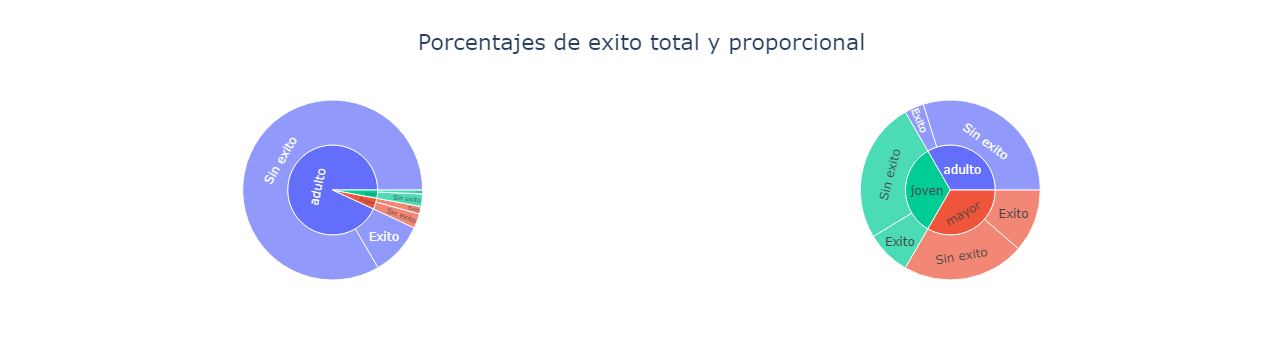

In [264]:
color_sunburst = {"joven": '#C4E6C3', "adulto": '#66B78D', "mayor": '#2A7271'}

target_grupos_global = (round(data.groupby(by="grupo_edad")["target"].value_counts()*100/len(data),2)).reset_index(name= "proporcion")
target_grupos_global["target"] = target_grupos_global["target"].apply(lambda x: "Exito" if x == 1 else "Sin exito")

target_grupos = (round(data.groupby(by="grupo_edad")["target"].value_counts(normalize=True)*100,2)).reset_index(name= "proporcion")
target_grupos["target"] = target_grupos["target"].apply(lambda x: "Exito" if x == 1 else "Sin exito")

grafico_1 = px.sunburst(target_grupos_global,
                      path=['grupo_edad', "target"],
                      values='proporcion',
                      color_discrete_map= color_sunburst)

grafico_2 = px.sunburst(target_grupos,
                      path=['grupo_edad', "target"],
                      values='proporcion',
                      color_discrete_map= color_sunburst)


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "sunburst"}, {"type": "sunburst"}]])

fig.add_trace(grafico_1.data[0], row=1, col=1)
fig.add_trace(grafico_2.data[0], row=1, col=2)
fig.update_layout(title_text="Porcentajes de exito total y proporcional", title_x=0.5, title_font_size=22)
fig.show()

<span style="font-size:larger;">
    
Definimos la tasa de exito total como el porcentaje de éxito que ha tenido cada grupo en la campaña. Del gráfico de la izquierda anterior observamos que:
    
- El <u>**grupo de adultos**</u> presenta la <u>**mayor cantidad**</u> de <u>**contrataciones**</u> con un 9.66%, esto se debe a que son el grupo mayoritario.
- El grupo de jovenes y mayores sigue al anterior con una tasa de exito del 0.71% y 1.34% respectivamente.
    
A pesar de que el <u>**grupo de adultos**</u> genere los mayores ingresos, dentro de su propio grupo es el que presenta la <u>**menor tasa de éxito**</u>, siendo esta de un <u>**10%**</u>.
En cuanto al resto de grupos encontramos en los <u>**jovenes**</u> una tasa de éxito del <u>**24%**</u> y en el de <u>**mayores**</u> del <u>**34%**</u>.
    
Para hacernos una idea de los perfiles contratantes en cada grupo realizaremos un análisis de cada uno de ellos.

</span>

## 5.3. Análisis de los perfiles por grupo

<span style="font-size:larger;">
    
Vamos a comenzar comparando los saldos en cada grupo:
    
</span>

### 5.3.1. Distribución de saldos por grupo

In [296]:
data.groupby("grupo_edad")["saldo"].describe()

,count,mean,std,min,25%,50%,75%,max
grupo_edad,,,,,,,,
adulto,41194.0,1329.302374,2957.818186,-8019.0,67.0,434.0,1389.0,102127.0
joven,1309.0,907.915202,1847.019530,-1414.0,85.0,363.0,1003.0,23878.0
mayor,1753.0,2455.694238,5086.727394,-4057.0,272.0,1060.0,2785.0,81204.0


<span style="font-size:larger;">
    
De la tabla obtenemos que los clientes con <u>**mayor saldo medio**</u> son los <u>**mayores**</u>, seguido por adultos y jovenes. Notar que estas medias presentan una **gran desviación** estandar debido a tener una gran dispersión en los datos.
    
Comparemos la distribución de los saldos en cuenta de los diferentes grupos de edad:
</span>

In [279]:
data_log = data.copy()
data_log["saldo_log"] = data_log["saldo"].apply(lambda x: np.log(x+1))

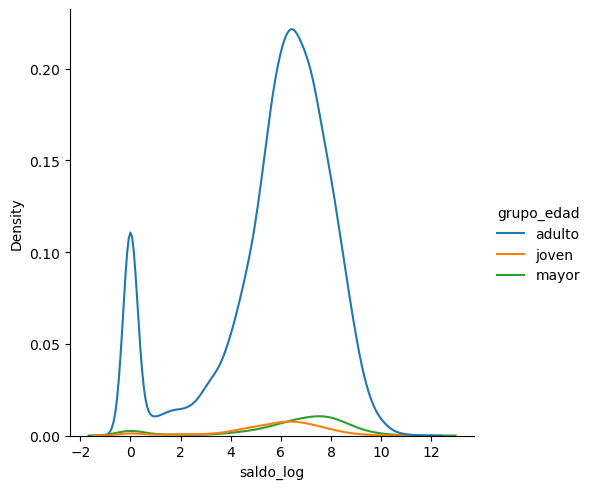

In [287]:
sns.displot(data= data_log, x="saldo_log", hue="grupo_edad", kind="kde");

<span style="font-size:larger;">

Vamos a continuar nuestro análisis por el grupo de mayor interés, el de adultos. Este grupo contiene la mayor parte de clientes y tiene la menor tasa de éxito entre los grupos, por ello es de vital importancia identificar las características de los perfiles que contratan y tratar de enfocar la campaña en estos perfiles.

</span>

### 5.3.2. Adultos

In [270]:
adultos_mask = (data["grupo_edad"] == "adulto")
data_adultos = data[adultos_mask]

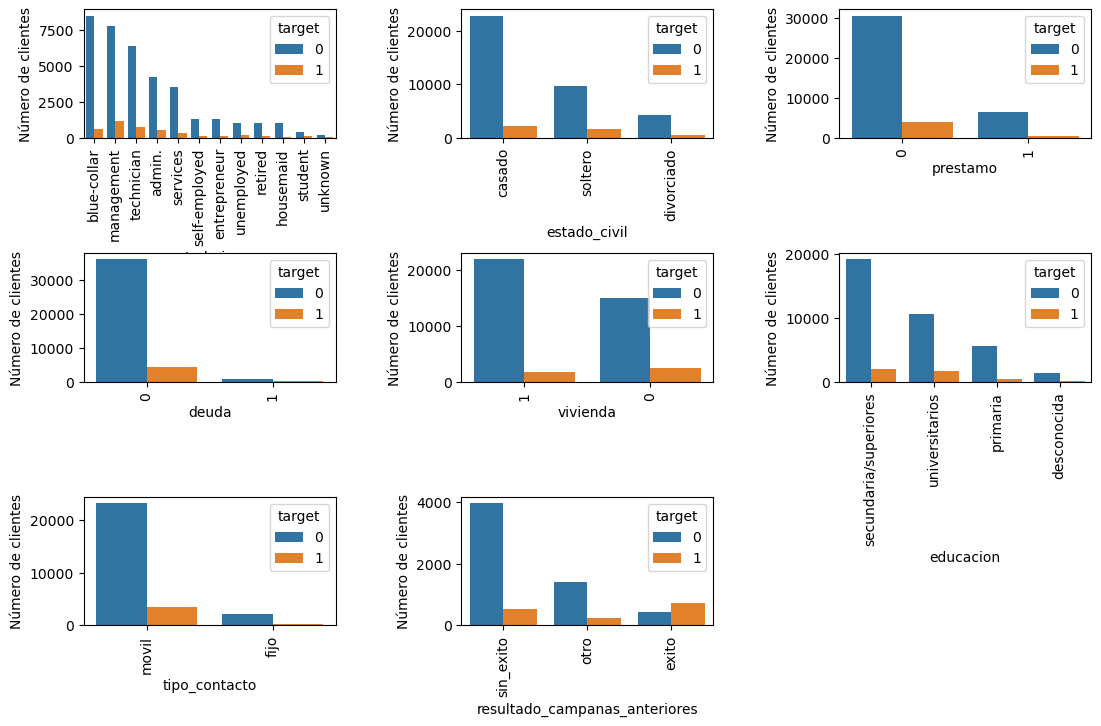

In [271]:
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize= (13, 8))
plt.subplots_adjust(hspace=0.9, wspace=0.5)
ax = ax.flatten()

columnas = ["trabajo", "estado_civil", "prestamo", "deuda", "vivienda", "educacion", "tipo_contacto", "resultado_campanas_anteriores", "target"]

# Voy creando los plots con bucle:
for idx, column in enumerate(columnas[: -1]):
    sns.countplot(x = data_adultos[column], hue=data_adultos["target"], ax= ax[idx], order = data_adultos[column].value_counts().index);
    ax[idx].tick_params(axis='x', rotation=90)
    ax[idx].set_ylabel('Número de clientes')
    
fig.delaxes(ax[-1])
plt.show()

In [274]:
data_adultos.groupby(["deuda", "vivienda", "prestamo", "target"]).size().unstack()

target                       0     1
deuda vivienda prestamo             
0     0        0         12332  2299
               1          2349   186
      1        0         17739  1504
               1          3772   241
1     0        0           189    14
               1           153     8
      1        0           269    19
               1           114     6

<span style="font-size:larger;">

El <u>**principal perfil contratante**</u> para el grupo de adultos es aquel que <u>**no tiene deuda, no es propietario de inmueble y no tiene prestamos**</u>. Observamos también un <u>**perfil similar**<u/> que contrata, el que es <u>**propietario de un inmueble y no tiene ni deuda ni prestamo.**</u>.
    
En cuanto al <u>**trabajo**</u> observamos que los perfiles que <u>**más contratan**</u> son <u>**gerentes**</u>, <u>**técnicos**</u>, <u>**obreros**</u> y <u>**administrativos.**</u>

En referencia a la <u>**educación**</u>, principalmente tenemos perfiles con <u>**secundaria/superiores**</u> y <u>**universitarios**</u> entre los que contratan.
    
Por último analizamos a los clientes que participaron en la campaña anterior, de los que no contrataron ahora hay un porcentaje que sí lo ha hecho. En cuanto a los que contrataron un deposito la última vez, ahora solo unos pocos no lo han vuelto a contratar. Los catalogados como "otro" pudieron estar indecisos, de estos ahora han contratado un pequeño porcentaje.

    
Exploremos ahora las posibles correlaciones entre nuestras variables en este grupo:
</span>

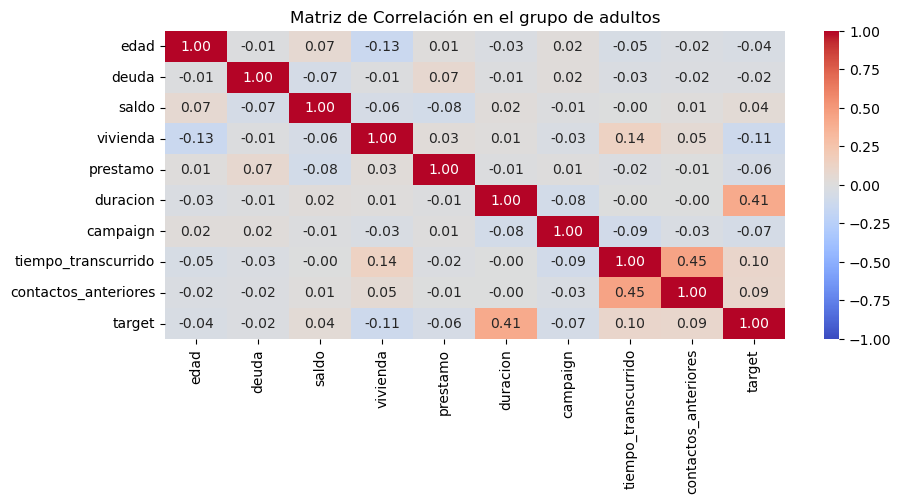

In [189]:
correlation_matrix = data_adultos.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize = (10,4))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación en el grupo de adultos')
plt.show()

<span style="font-size:larger;">
    
Existe una <u>**correlación**</u>, aunque no fuerte, entre la <u>**duración de la última llamada**</u> y que <u>**contraten un depósito**</u>. Mayor tiempo de duración se correlaciona con que se contrate un depósito.
    
Veamos como se distribuyen los datos de la variable "duracion":

</span>

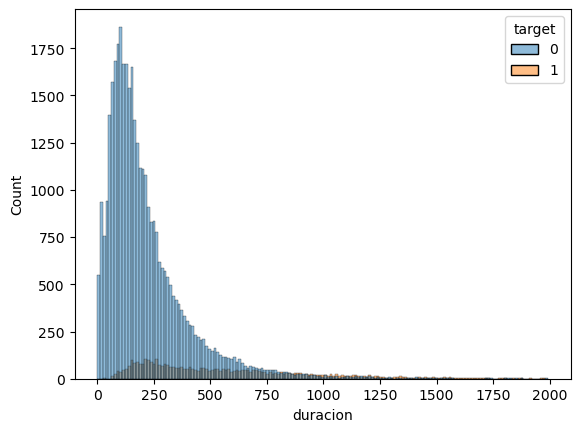

In [309]:
mask_duracion = (data_adultos["duracion"] < 2000)
sns.histplot(x= data_adultos[mask_duracion]["duracion"], hue=data_adultos["target"]);

### 5.3.3. Jovenes

In [277]:
jovenes_mask = (data["grupo_edad"] == "joven")
data_jovenes = data[jovenes_mask]

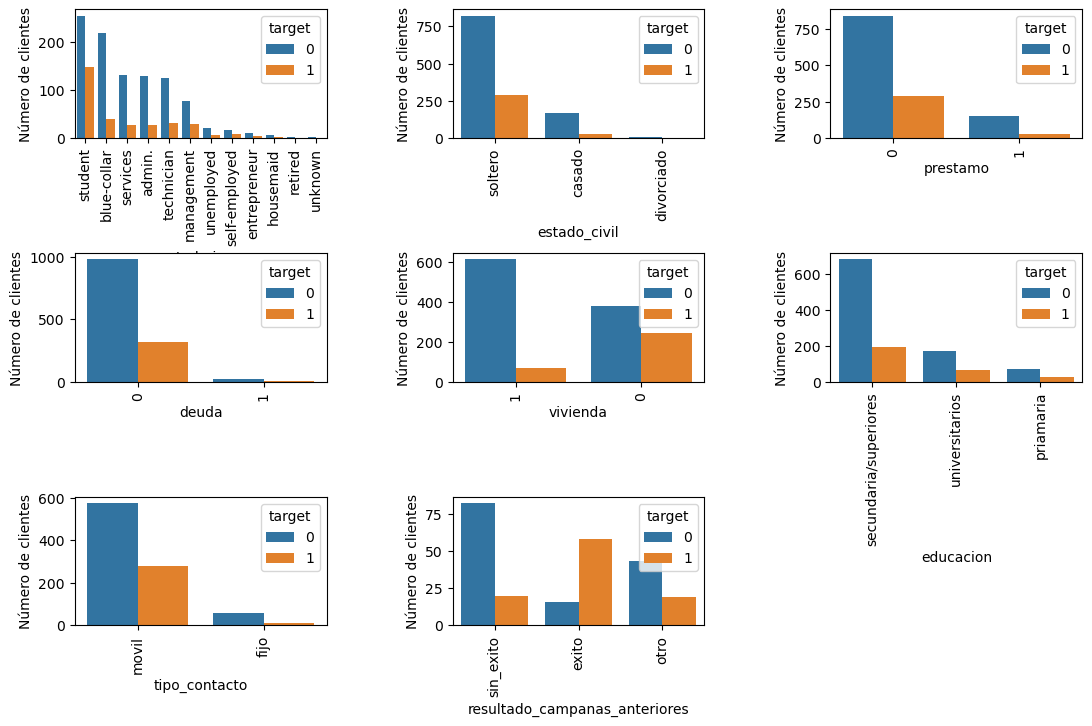

In [162]:
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize= (13, 8))
plt.subplots_adjust(hspace=0.9, wspace=0.5)
ax = ax.flatten()

columnas = ["trabajo", "estado_civil", "prestamo", "deuda", "vivienda", "educacion", "tipo_contacto", "resultado_campanas_anteriores", "target"]

# Voy creando los plots con bucle:
for idx, column in enumerate(columnas[: -1]):
    sns.countplot(x = data_jovenes[column], hue=data_jovenes["target"], ax= ax[idx], order = data_jovenes[column].value_counts().index);
    ax[idx].tick_params(axis='x', rotation=90)
    ax[idx].set_ylabel('Número de clientes')
    
fig.delaxes(ax[-1])
plt.show()

In [281]:
data_jovenes.groupby(["deuda", "vivienda", "prestamo", "target"]).size().unstack()

target                       0      1
deuda vivienda prestamo              
0     0        0         323.0  228.0
               1          53.0   19.0
      1        0         510.0   60.0
               1          91.0    6.0
1     0        0           2.0    NaN
               1           1.0    NaN
      1        0           7.0    2.0
               1           7.0    NaN

<span style="font-size:larger;">

El <u>**principal perfil contratante**</u> para el grupo de jovenes es aquel que <u>**no tiene deuda, no es propietario de inmueble y no tiene prestamos**</u>. 

En cuanto al <u>**trabajo**</u> observamos que la <u>**mayor parte**</u> de los perfiles son <u>**estudiantes**</u> y <u>**obreros**</u>, siendo <u>**los que más contratan**</u> los <u>**estudiantes**</u>.

En referencia a la <u>**educación**</u>, al igual que los adultos, tenemos perfiles con <u>**secundaria/superiores**</u> y <u>**universitarios**</u> entre los que contratan, quedando unos pocos con primaria que lo hacen.
    
Observamos un diferencia significativa entre los que tienen inmuebles y los que no, siendo estos últimos los más propensos a contratar un deposito.
    
Por último analizamos a los clientes que participaron en la campaña anterior, en este caso observamos un aumento en el número de contrataciones en la última campaña.

    
Exploremos, al igual que en el caso anterior, las posibles correlaciones entre nuestras variables en este grupo:
</span>

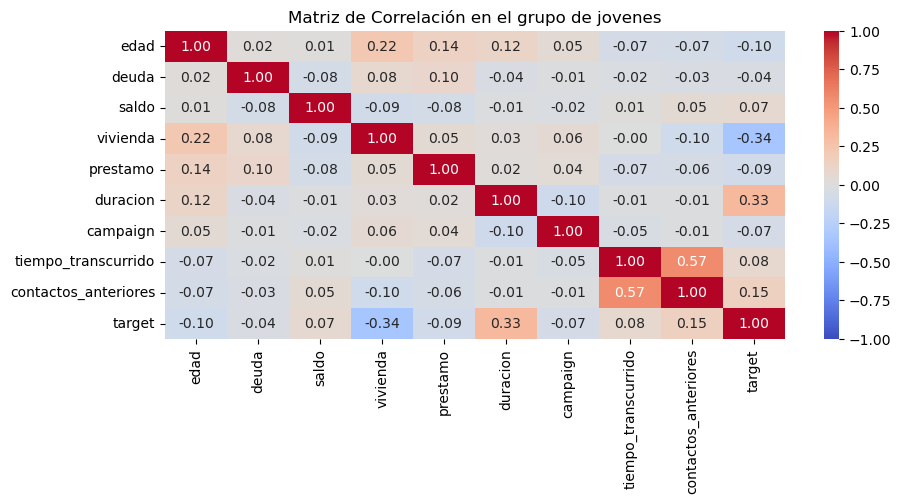

In [191]:
correlation_matrix = data_jovenes.select_dtypes(include=['float64', 'int64', 'bool']).corr()
plt.figure(figsize = (10,4))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación en el grupo de jovenes')
plt.show()

<span style="font-size:larger;">
    
Al igual que antes existe una <u>**correlación**</u> entre la <u>**duración de la última llamada**</u> y que <u>**contraten un depósito**</u>. En este grupo también se observa una <u>**correlación negativa**</u> entre la <u>**vivienda**</u> y que <u>**contraten**</u>, traduciéndose en que menor vivienda tiene mayor probabilidad de contratación.
    
Veamos como se distribuyen los datos de la variable "duracion":

</span>

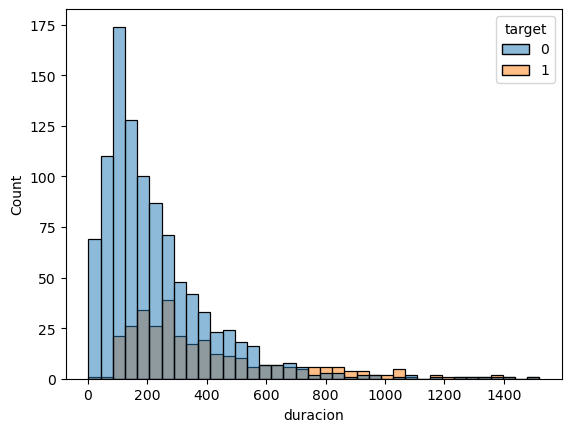

In [307]:
sns.histplot(x= data_jovenes["duracion"], hue=data_jovenes["target"]);

### 5.3.4. Mayores

In [141]:
mayores_mask = (data["grupo_edad"] == "mayor")
data_mayores = data[mayores_mask]

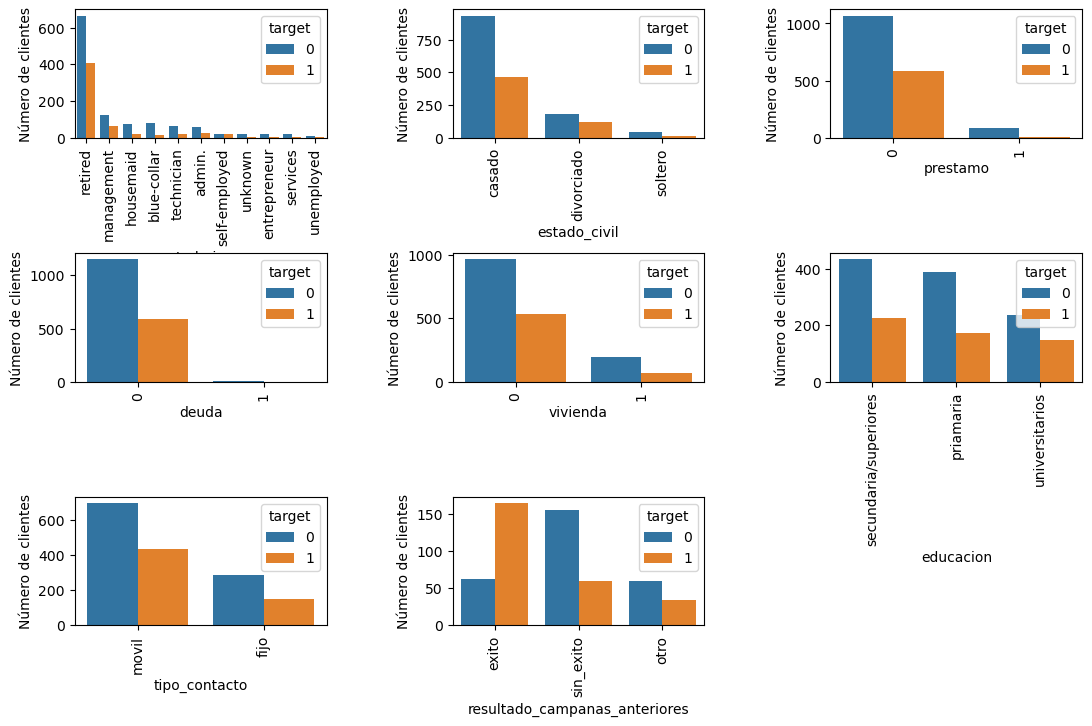

In [163]:
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize= (13, 8))
plt.subplots_adjust(hspace=0.9, wspace=0.5)
ax = ax.flatten()

columnas = ["trabajo", "estado_civil", "prestamo", "deuda", "vivienda", "educacion", "tipo_contacto", "resultado_campanas_anteriores", "target"]

# Voy creando los plots con bucle:
for idx, column in enumerate(columnas[: -1]):
    sns.countplot(x = data_mayores[column], hue=data_mayores["target"], ax= ax[idx], order = data_mayores[column].value_counts().index);
    ax[idx].tick_params(axis='x', rotation=90)
    ax[idx].set_ylabel('Número de clientes')
    
fig.delaxes(ax[-1])
plt.show()

In [188]:
data_mayores.groupby(["deuda", "vivienda", "prestamo", "target"]).size().unstack()

target                       0      1
deuda vivienda prestamo              
0     0        0         903.0  526.0
               1          54.0    5.0
      1        0         163.0   57.0
               1          31.0    6.0
1     0        0           3.0    NaN
               1           2.0    NaN
      1        0           NaN    1.0
               1           2.0    NaN

<span style="font-size:larger;">

Por último tenemos el grupo de mayores, siendo en este el <u>**principal perfil contratante**</u> aquel que <u>**no tiene deuda, no es propietario de inmueble y no tiene prestamos**</u>.

En cuanto al <u>**trabajo**</u> observamos que la <u>**gran parte**</u> de los perfiles son <u>**jubilados**</u> y algunos pocos <u>**gerentes**</u>, siendo <u>**los que más contratan**</u> los <u>**jubilados**</u>.

En referencia a la <u>**educación**</u>, cambia con respecto a los otros grupos, teniendo perfiles con <u>**secundaria/superiores**</u>, <u>**primaria**</u> y en menor número <u>**universitarios**</u>. En este grupo los tres perfiles educativos tienen tendencia a contratar depositos.
    
Observamos un diferencia significativa entre los que tienen inmuebles y los que no, siendo estos últimos los más propensos a contratar un deposito.
    
Por último analizamos a los clientes que participaron en la campaña anterior y, al igual que en el grupo de jovenes, observamos un aumento en el número de contrataciones en la última campaña.
    
A continuación exploraremos las posibles correlaciones entre nuestras variables en este grupo:
</span>

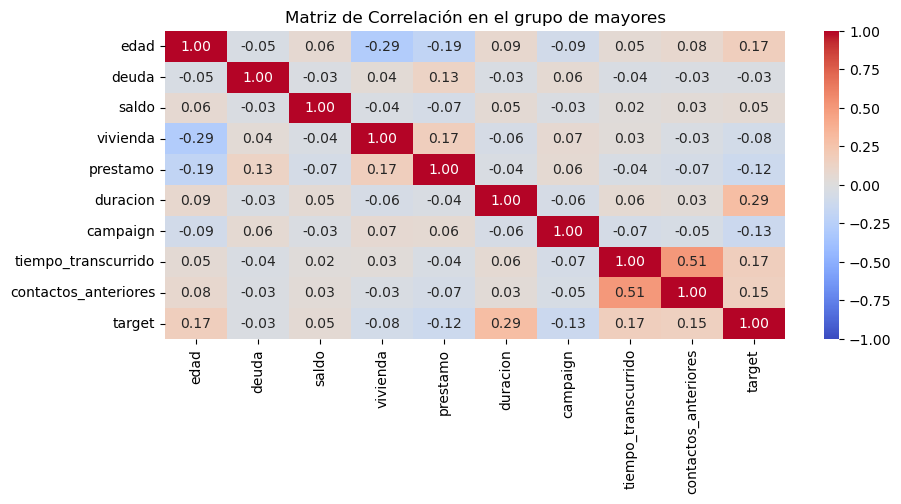

In [190]:
correlation_matrix = data_mayores.select_dtypes(include=['float64', 'int64', 'bool']).corr()
plt.figure(figsize = (10,4))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación en el grupo de mayores')
plt.show()

<span style="font-size:larger;">
    
En este grupo aparecen correlaciones positivas leves tales como:
- Edad: A mayor edad parece haber mayor probabilidad de contratación.
- Duración: Al igual que en los casos anteriores, la duración de la llamada es signo de mayor probabilidad de contratación.
<br>
    
Veamos como se distribuyen los datos de la variable "duracion":

</span>

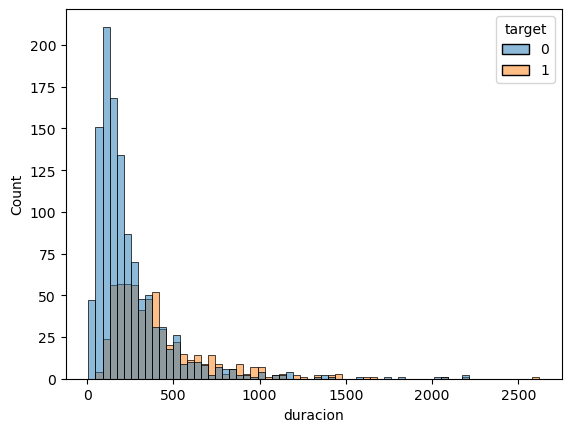

In [304]:
sns.histplot(x= data_mayores["duracion"], hue=data_mayores["target"]);

# 6. Modelaje

<span style="font-size:larger;">

Tras haber explorado los datos, vamos a construir un modelo de clasificación binaria que nos permita predecir que clientes de nuestro conjunto contratarán un depósito o no. 

Para ello prepararemos el dataset de tal forma que el modelo pueda procesarlo.
    
</span>

In [17]:
data_modeling = data.copy()

In [33]:
data_modeling["estado_civil"].unique()

array(['casado', 'soltero', 'divorciado'], dtype=object)

## 6.1. Tratamiento de valores nulos

<span style="font-size:larger;">
    
Vamos a tratar solo la columna de "educacion" ya que las otras dos con valores nulos no las utilizaremos para nuestro análisis.
    
Por simplicidad hemos decidido crear una nueva categoría: "desconocida". Se podría haber abordado imputando valores con KNNImputer, buscando los vecinos más cercanos para asignarle un valor a eduación según similitud.

</span>

In [21]:
data_modeling["educacion"] = data_modeling["educacion"].fillna("desconocida")

## 6.2. Tratamiento de outliers

<span style="font-size:larger;">

Dado que no se ve la necesidad de aplicar el método de Tukey, vamos a eliminar valores atipicos encontrados en el apartado 4 de nuestro análisis exploratorio para las siguientes variables filtrando:

</span>

<span style="font-size:larger;">

* **Saldo**:

</span>

In [24]:
data_modeling = data_modeling[data_modeling["saldo"] < 48000]

<span style="font-size:larger;">

* **Contactos anteriores**:

</span>

In [26]:
data_modeling = data_modeling[data_modeling["contactos_anteriores"] < 300]

## 6.3. Transformación de columnas

### 6.3.1. Limpieza columnas

<span style="font-size:larger;">
    
* Limpio la columnas "educacion":
    
</span>

In [29]:
data_modeling["educacion"] = data_modeling["educacion"].apply(lambda x: re.sub(r'\b(pri\w*)\b', 'primaria', x))

### 6.3.2. Encoding

In [36]:
def column_encoder(df, columns, encoder, ruta_encoders):
    
    for num, column in enumerate(columns):
        
        data_encoded = encoder.fit_transform(df[[column]]).toarray()
            
        with open(ruta_encoders + f"{num}_{column}_encoder.pickle", 'wb') as archivo:
            pickle.dump(encoder, archivo)
            
        df_encoded = pd.DataFrame(data_encoded, columns= encoder.categories_[0].tolist())
        df = pd.concat([df, df_encoded], axis=1).drop([column], axis=1)
        
    return df

In [78]:
data_encoded = data_modeling.copy().reset_index(drop=True)

In [79]:
columns = ["trabajo", "estado_civil", "educacion"]
ruta_encoders = "utiles/encoders/"
encoder = OneHotEncoder()

data_encoded = column_encoder(data_encoded, columns, encoder, ruta_encoders)

### 6.3.3. Eliminación de columnas

In [80]:
data_encoded = data_encoded.drop(columns= ["tipo_contacto", "resultado_campanas_anteriores", "fecha_contacto", "grupo_edad"])

## 6.4. Balance de clases

<span style="font-size:larger;">
    
Vamos a crear unas pocas clases sintéticas para intentar que nuestro modelo no tienda demasiado hacia la clase mayoritaria.
    
</span>

In [83]:
round(data_encoded["target"].value_counts(normalize=True)*100, 2)

target
0    88.28
1    11.72
Name: proportion, dtype: float64

In [84]:
X_data = data_encoded.drop(["target"], axis=1)
y_data = data_encoded["target"]

In [85]:
oversampling = SMOTE(sampling_strategy = 0.15)
X_balanceado, y_balanceado = oversampling.fit_resample(X_data, y_data)

In [88]:
round(y_balanceado.value_counts(normalize=True)*100, 2)

target
0    86.96
1    13.04
Name: proportion, dtype: float64

## 6.5. Selección de Modelo

In [89]:
modelos = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), NearestCentroid(), RandomForestClassifier(), SVC(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), HistGradientBoostingClassifier()]

### 6.5.1. Cross Validation

<span style="font-size:larger;">
    
Para evaluar el rendimiento de nuestro modelo, emplearemos técnicas de validación cruzada. Esto implica dividir nuestro conjunto de datos en múltiples subconjuntos, entrenar el modelo en diferentes combinaciones de estos subconjuntos y evaluar su rendimiento. La validación cruzada ayuda a garantizar que nuestro modelo sea robusto y no se ajuste demasiado a los datos de entrenamiento.

* <u>**Hold Out**</u>:
    
</span>

In [95]:
def hold_out(modelos, X, y):
    
    model_cross_holdout = []

    for modelo in modelos:

        accuracy_holdout, precision_holdout, recall_holdout = [], [], []

        for i in range(20):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)

            accuracy_holdout.append(accuracy_score(y_test, y_pred))
            precision_holdout.append(precision_score(y_test, y_pred, average = "macro"))
            recall_holdout.append(recall_score(y_test, y_pred, average = "macro"))

        model_cross_holdout.append([str(modelo).split("(")[0],
                                    np.array(accuracy_holdout).mean(),
                                    np.array(precision_holdout).mean(),
                                    np.array(recall_holdout).mean()
                                   ])

    df_cross_holdout = pd.DataFrame(model_cross_holdout, columns= ["nombre", "mean_accuracy", "mean_precision", "mean_recall"])
    df_cross_holdout.to_csv("resultados/cross_holdout_results.csv", index= False, sep= ",")
    
    return df_cross_holdout

In [96]:
data_cross_holdout = hold_out(modelos, X_balanceado, y_balanceado)

In [97]:
data_cross_holdout.sort_values(by= "mean_recall", ascending= False).head(3)

,nombre,mean_accuracy,mean_precision,mean_recall
8,XGBClassifier,0.898124,0.789592,0.711598
9,HistGradientBoostingClassifier,0.898414,0.790901,0.711438
4,RandomForestClassifier,0.895191,0.785860,0.691944


<span style="font-size:larger;">

* <u>**Stratified k-Fold**</u>:
    
</span>

In [90]:
def stratified_k_fold(modelos, X, y, splits= 5):
    
    model_cross_skfold = []
    
    skfold = StratifiedKFold(n_splits = splits)
    for modelo in modelos:

        y_test_real, y_pred = [], []

        for train_index, test_index in skfold.split(X, y):

            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            modelo.fit(X_train, y_train)
            y_pred_1 = modelo.predict(X_test)
            y_pred.extend(y_pred_1)
            y_test_real.extend(y_test)

        model_cross_skfold.append([str(modelo).split("(")[0],
                                   accuracy_score(y_test_real, y_pred),
                                   precision_score(y, y_pred, average = "macro"),
                                   recall_score(y, y_pred, average = "macro")
                                    ])

    df_cross_skfold = pd.DataFrame(model_cross_skfold, columns= ["nombre", "accuracy", "precision", "recall"])
    df_cross_skfold.to_csv("resultados/cross_skfold_results.csv", index= False, sep= ",")
    
    return df_cross_skfold

In [91]:
data_cross_5fold = stratified_k_fold(modelos, X_balanceado, y_balanceado)

In [93]:
data_cross_5fold.sort_values(by= "recall", ascending= False).head(5)

,nombre,accuracy,precision,recall
9,HistGradientBoostingClassifier,0.891546,0.714077,0.641948
8,XGBClassifier,0.889141,0.707751,0.639660
1,GaussianNB,0.826064,0.611390,0.637866
4,RandomForestClassifier,0.890700,0.717503,0.635090
7,GradientBoostingClassifier,0.889854,0.713827,0.631454


<span style="font-size:larger;">
    
Escogeremos HistGradientBoostingClassifier ya que puede procesar con rapidez datasets de más de 10.000 datos. Además puede procesar variables categóricas y valores nulos(en nuestro caso hemos hecho un encoding ya que probamos con GBC).
    
</span>

## 6.6. Tuning HistGradientBoostingClassifier

<span style="font-size:larger;">

[Documentacion HGBC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)

</span>


In [101]:
def tunning(modelo, parametros, scorer, X_train, X_test, y_train, y_test):
    
    resultados = []

    grid_solver = GridSearchCV(estimator  = modelo,
                               param_grid = parametros,
                               scoring    = scorer,
                               cv         = 5,
                               refit      = "recall",
                               n_jobs     = 1,
                               verbose    = 0
                              )

    model_result = grid_solver.fit(X_train, y_train)

    # Mejor modelo:
    best_model = model_result.best_estimator_
    params_best_model = best_model.get_params()

    y_pred = best_model.predict(X_test)

    # Metricas:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    resultados.append([str(modelo).split("(")[0], params_best_model, accuracy, precision, recall])
    df_resultados = pd.DataFrame(resultados, columns= ["Nombre","Parametros","Accuracy", "Precision", "Recall"])
    
    df_resultados.to_csv("resultados/resultados_tuning_HGBC.csv", index= "False", sep= ",")
    dump(best_model, "utiles/modelo/modelo_hgbc.pkl")
    
    return df_resultados

<span style="font-size:larger;">
    
* Separo el set de datos en train y validation:
    
</span>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.2, random_state=42, stratify= y_balanceado)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35930, 28), y_train: (35930,)
X_test: (8983, 28), y_test: (8983,)


In [106]:
model_HGBC = HistGradientBoostingClassifier(random_state=42)

scorer = ["recall"]

params = {"learning_rate"       : [0.1, 0.05, 0.01],
          "max_iter"            : [100, 150],
          "max_leaf_nodes"      : [31, 41],
          "max_depth"           : [None, 3, 5, 8],
          "min_samples_leaf"    : [20, 50, 100],
         }

resultados_tuning_HGBC = tunning(model_HGBC, params, scorer, X_train, X_test, y_train, y_test)

In [107]:
resultados_tuning_HGBC[["Nombre", "Accuracy", "Precision", "Recall"]]

,Nombre,Accuracy,Precision,Recall
0,HistGradientBoostingClassifier,0.899477,0.665031,0.462457


### 6.6.1 Feature importance

<span style="font-size:larger;">

Veamos que columnas tienen mayor importancia a la hora de predecir en nuestro modelo:
    
</span>

In [123]:
def feature_importance_eval(modelo, X, y):
    
    result = permutation_importance(modelo, X, y, n_repeats=10, random_state=0)

    importances = (result.importances_mean)*10

    indices = np.argsort(importances)[::-1]

    columns_plot = []

    for f in range(X_balanceado.shape[1]):

        feature = indices[f]
        importancia = importances[indices[f]]
        column_name = X_balanceado.columns[f]

        columns_plot.append(column_name)

    plt.figure(figsize = (12, 8))

    plt.title("Feature Importances")

    plt.bar(range(X_balanceado.shape[1]), importances[indices], color = "r", align = "center")
    plt.xticks(range(X_balanceado.shape[1]), columns_plot, rotation = 90)
    plt.grid()
    
    return columns_plot

In [124]:
model_hgbc = load("utiles/modelo/modelo_hgbc.pkl")

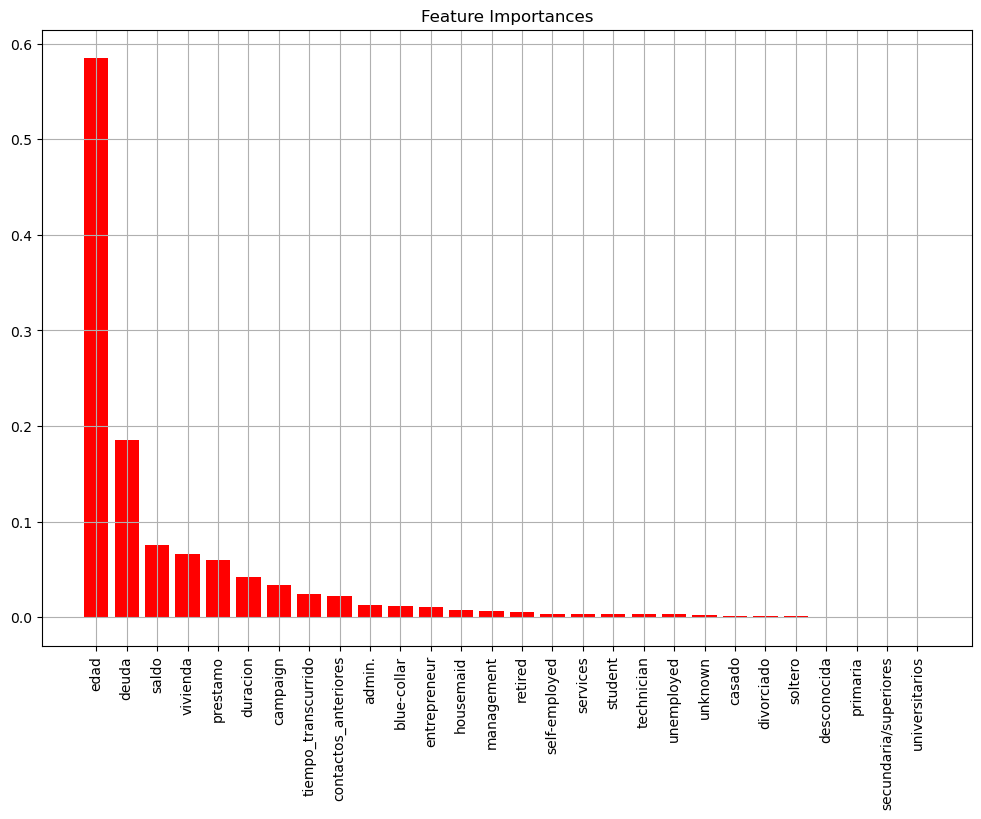

In [125]:
feature_importance_plot = feature_importance_eval(model_hgbc, X_balanceado, y_balanceado)

In [126]:
def complexity_evaluation(columns_plot, X_train, X_test, y_train, y_test, modelo):

    results_columnas = []
    
    num_cols = len(X_train.columns)

    for idx in range(1,(num_cols + 1)):

        columnas_menos_importantes = columns_plot[idx :]

        X_train_sincol, X_test_sincol = X_train.drop(columnas_menos_importantes, axis = 1), X_test.drop(columnas_menos_importantes, axis = 1)

        modelo.fit(X_train_sincol, y_train)

        y_pred = modelo.predict(X_test_sincol)

        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)

        results_columnas.append([idx, acc, pre, rec])

    df_results_columnas = pd.DataFrame(results_columnas, columns= ["idx_col", "Accuracy", "Precision", "Recall"])
    
    return df_results_columnas

In [127]:
df_results_columnas = complexity_evaluation(feature_importance_plot, X_train, X_test, y_train, y_test, model_hgbc)

In [128]:
df_results_columnas.sort_values(by= "Recall", ascending= False).head(10)

,idx_col,Accuracy,Precision,Recall
26,27,0.901815,0.676829,0.473549
25,26,0.901369,0.676108,0.468430
23,24,0.900367,0.669523,0.466724
22,23,0.900924,0.674938,0.464164
19,20,0.900256,0.669951,0.464164
17,18,0.899922,0.667897,0.463311
27,28,0.899477,0.665031,0.462457
24,25,0.899811,0.668734,0.459898
20,21,0.900367,0.672909,0.459898
18,19,0.900701,0.675439,0.459898


<span style="font-size:larger;">

Observamos una mejora en las métricas con 27 columnas, volvamos a entrenarlo teniendo en cuenta estas columnas(No lo haré por no repetir proceso).
    
**Notar que podríamos reducir la complejidad del modelo escogiendo 18 columnas sin perden que perder precisión ganando interpretabilidad.**
    
</span>

## 6.7. Resultados y Conclusiones

<span style="font-size:larger;">

Vamos a testear nuestro modelo entrenado en los datos de test y ver que rendimiento y desempeño obtenemos. Para ello filtramos los datos de testeo con las mismas modificaciones realizadas en el proceso.
    
</span>

In [132]:
def pipeline(df):
    
    # Convierto variables bool a int:
    bool_dic = {"no": 0,
                "si": 1}
    
    df["deuda"] = df["deuda"].map(bool_dic)
    df["vivienda"] = df["vivienda"].map(bool_dic)
    df["prestamo"] = df["prestamo"].map(bool_dic)
    df["target"] = df["target"].map(bool_dic)
    
    # Asigno categoria "desconocido" a "educacion" para tratar NaN's:
    df["educacion"] = df["educacion"].fillna("desconocida")
    
    # Limpio la columna educacion:
    df["educacion"] = df["educacion"].apply(lambda x: re.sub(r"\b(pri\w*)\b", "primaria", x))
    

    # Cargo los encoders para las columnas categóricas:
    columns = ["trabajo", "estado_civil", "educacion"]
               
    for num, column in enumerate(columns):
        ruta = f"utiles/encoders/{num}_{column}_encoder.pickle"

        with open(ruta, "rb") as f:
            encoder = pickle.load(f)

        data_encoded = encoder.transform(df[[column]]).toarray()
        df_encoded = pd.DataFrame(data_encoded, columns= encoder.categories_[0].tolist())
        df = pd.concat([df, df_encoded], axis=1).drop([column], axis=1)


    # Quito las columnas que no se utilizarán:
    df = df.drop(columns= ["ID", "tipo_contacto", "resultado_campanas_anteriores", "fecha_contacto"])
    
    return df

In [139]:
def calculate_metrics(y_pred, y_test, threshold = 0.5):
    
    y_pred_threshold= [0 if prediction[0] > threshold else 1 for prediction in y_pred]
    
    cm = confusion_matrix(y_test, y_pred_threshold)
    # True Negatives (TN)
    tn = cm[0][0]
    # False Positives (FP)
    fp = cm[0][1]    
    # False Negatives (FN)
    fn = cm[1][0]
    # True Positives (TP)
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fn + fp + tn )
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    
    return accuracy, precision, recall, cm

<span style="font-size:larger;">
    
* Filtro los datos de test:
    
</span>

In [133]:
test_data_encoded = pipeline(test_data)

<span style="font-size:larger;">
    
* Cargo el modelo entrenado:
    
</span>

In [134]:
model_hgbc = load("utiles/modelo/modelo_hgbc.pkl")

<span style="font-size:larger;">
    
* Separo variables y corro el modelo:
    
</span>

In [135]:
X_test = test_data_encoded.drop(["target"], axis=1)
y_test = test_data_encoded["target"]

In [136]:
y_pred = model_hgbc.predict_proba(X_test)

<span style="font-size:larger;">
    
### <u>**Resultados de la predicción**</u>
    
</span>

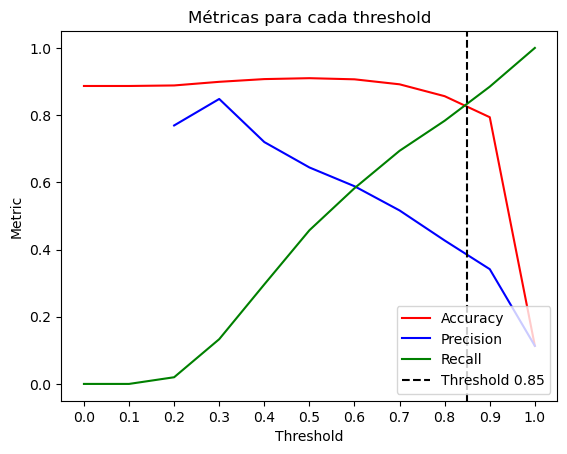

In [160]:
threshold_range = [i/10 for i in range(0,11)]

acc_list, prec_list, rec_list = [], [], []
for threshold in threshold_range:
    accuracy, precision, recall, cm = calculate_metrics(y_pred, y_test, threshold)
    acc_list.append(accuracy)
    prec_list.append(precision)
    rec_list.append(recall)    

plt.plot(threshold_range, acc_list, "r", label="Accuracy")
plt.plot(threshold_range, prec_list, "b", label="Precision")
plt.plot(threshold_range, rec_list, "g", label="Recall")

plt.title("Métricas para cada threshold")
plt.ylabel("Metric")
plt.xlabel("Threshold")
plt.xticks(threshold_range)
plt.axvline(x=0.85, color="k", linestyle="--", label="Threshold 0.85")
plt.legend(loc= "lower right")

plt.show()

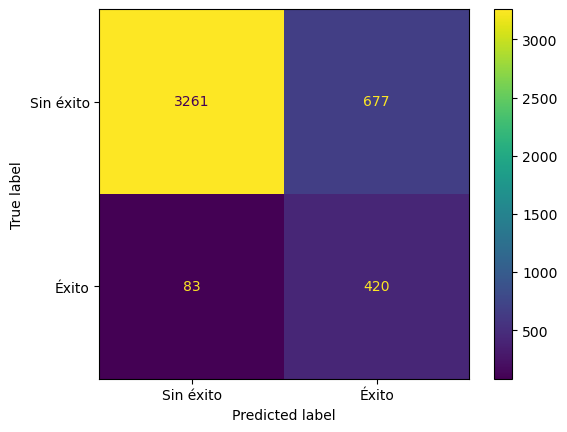

Accuracy : 0.829
Precision : 0.383
Recall : 0.835


In [167]:
threshold = 0.85
accuracy, precision, recall, cm = calculate_metrics(y_pred, y_test, threshold)

labels = ["Sin éxito", "Éxito"]
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()
print("Accuracy :", round(accuracy, 3))
print("Precision :", round(precision, 3))
print("Recall :", round(recall, 3))

<span style="font-size:larger;">
    
En el caso que nos ocupa la <u>**métrica de interés**</u> es el <u>**recall**</u>. Esto se debe a que <u>**necesitamos captar la mayor cantidad de clientes**</u> que contraten un deposito sacrificando precisión, es decir, que si no estamos seguros al 85% de que un cliente no va a contratar lo clasificaremos como Éxito.
    
En la matriz de confusión observamos que <u>**se han predicho 420 verdaderos positivos y 83 falsos negativos**</u>, obteniendo por tanto un <u>**83.5% de recall**</u>.
    
Por último notar que nuestro modelo ha logrado aprender ya que predice mejor que un modelo de prueba, es decir, si ponemos el threshold a 0.5 obtenemos un accuracy del 91% superando al modelo de prueba que sería de un 88%.
    
</span>

In [164]:
data["target"].value_counts(normalize=True)

target
0    0.882796
1    0.117204
Name: proportion, dtype: float64

<span style="font-size:larger;">

Para llevar esta solución a producción sería necesario integrar en el sistema de la entidad bancaria el flujo de transformación de datos para la predicción. Esto se podría hacer en tiempo real conectado con la base de datos de clientes y transformando los datos obtenidos.
    
También sería necesario:
    
* Un monitoreo del rendimiento del modelo por si fallase en algún momento.
* Actualizar el modelo con cada campaña realizada.
    
Todo ello se implementaría en la nube, sea AWS o Azure, en una máquina virtual.
    
</span>